<br/>
<div class="alert alert-info">
Привет, приятно познакомиться

## Описание исследования 

Пред нами имеется 3 файла с информацией о молочной ферме, эти данные необходимо: 
1. Загрузить данные 
2. Проверить имеющуюся информацию на наличие несоответсвий (дублирование, пропуски, отклоенения) 
3. Произвести исследовательский анализ
4. Обнаружить коррелящионные зависимости между показателями, применить зависимости не только Пирсона, но и коэф. корр. Ф если имеются категориальные переменные
5. Произвести обучение линейной регрессии и построить на основании данной модели предсказания критерия "Удой" 
6. Произвести обучение логической регрессии и построить на основании данной модели предсказания критерия "Вкус молока"

По результату необходимо написать вывод и предложить бизнесу возможные советы.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik -q
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Загрузка данных

In [2]:
ferma_main = pd.read_csv (r"C:\Users\nssavinov\Desktop\Пректы практикум\6 Линейные модели в МО\ferma_main.csv", sep = ';')
ferma_dad = pd.read_csv (r"C:\Users\nssavinov\Desktop\Пректы практикум\6 Линейные модели в МО\ferma_dad.csv", sep = ';')
cow_buy = pd.read_csv (r"C:\Users\nssavinov\Desktop\Пректы практикум\6 Линейные модели в МО\cow_buy.csv", sep = ';')

df = [ferma_main, ferma_dad, cow_buy]
for i in df:
    display (i.info())
    display (i.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   

  СПО (Сахаро-протеиновое соотношение)          Порода Тип пастбища  \
0                                 0,89  Вис Бик Айдиал    Равнинное   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

id Имя Папы
0   1   Буйный

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0  Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет

**Итоги данного шага:**

Было создано 3 таблицы с следующими наименованиями: 

ferma_main

ferma_dad

cow_buy

**Иучение данных таблиц** 
1. В всех таблицах нет пропусков, т.е. данные заполнены
2. Необходимо привести наименования столбцов к корректному виду, а именно сделать нижний регистр и избавиться от ненужных символов. 

In [3]:
for i in df:
    i.rename (columns = str.lower, inplace = True)

In [4]:
ferma_main = (ferma_main.rename (columns = {'удой, кг' : 'удой_кг', 
                                            'эке (энергетическая кормовая единица)' : 'энергетическая_кормовая_единица', 
                                            'сырой протеин, г' : 'сырой_протеин_г',
                                           'спо (сахаро-протеиновое соотношение)' : 'сахаро_протеиновое_соотношение',
                                           'тип пастбища' : 'тип_пастбища',
                                           'порода папы_быка' : 'порода_папы_быка',
                                           'жирность,%' : 'жирность_%',
                                           'белок,%' : 'белок_%',
                                           'вкус молока' : 'вкус_молока'})
             )
display (ferma_main.info())

ferma_dad = ferma_dad.rename (columns = {'имя папы' : 'имя_папы'})
display (ferma_dad.info())

cow_buy = cow_buy.rename (columns = {'тип пастбища' : 'тип_пастбища', 
                                    'порода папы_быка' : 'порода_папы_быка',
                                    'текущая_жирность,%' : 'текущая_жирность_%',
                                    'текущий_уровень_белок,%' : 'текущий_уровень_белок_%'})
display (cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               634 non-null    int64 
 1   удой_кг                          634 non-null    int64 
 2   энергетическая_кормовая_единица  634 non-null    object
 3   сырой_протеин_г                  634 non-null    int64 
 4   сахаро_протеиновое_соотношение   634 non-null    object
 5   порода                           634 non-null    object
 6   тип_пастбища                     634 non-null    object
 7   порода_папы_быка                 634 non-null    object
 8   жирность_%                       634 non-null    object
 9   белок_%                          634 non-null    object
 10  вкус_молока                      634 non-null    object
 11  возраст                          634 non-null    object
dtypes: int64(3), object(9)
memory usage:

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип_пастбища             20 non-null     object
 2   порода_папы_быка         20 non-null     object
 3   имя_папы                 20 non-null     object
 4   текущая_жирность_%       20 non-null     object
 5   текущий_уровень_белок_%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

**Результатом первого шага** 

Выгруженны таблицы, наименования столбцов приведены к нижнему регистру и преобразованны в более читабельный и правильный формат

##  Предобработка данных

В данном пункте, необходимо выполнить следующее: 

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

1. Пропусков в таблицах нет, как уже было рассмотрено в предыдущем пункте
2. Проведем проверку на наличие дубликатов -  явных и неявных. 

In [5]:
def find_duplicate (x):
    for i in x:
        if i.duplicated().sum() > 0:
            display (f'В таблице явных дубликатов - {i.duplicated().sum()}')
        else:
            display (f'В таблице явных дубликатов - нет')

find_duplicate(df)

#т.е. необходимо ferma_main и cow_buy почистить от дубликатов c обновлением индексов

ferma_main = ferma_main.drop_duplicates()
ferma_main.info() 
cow_buy = cow_buy.drop_duplicates()
cow_buy.info()

'В таблице явных дубликатов - 5'

'В таблице явных дубликатов - нет'

'В таблице явных дубликатов - 4'

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               629 non-null    int64 
 1   удой_кг                          629 non-null    int64 
 2   энергетическая_кормовая_единица  629 non-null    object
 3   сырой_протеин_г                  629 non-null    int64 
 4   сахаро_протеиновое_соотношение   629 non-null    object
 5   порода                           629 non-null    object
 6   тип_пастбища                     629 non-null    object
 7   порода_папы_быка                 629 non-null    object
 8   жирность_%                       629 non-null    object
 9   белок_%                          629 non-null    object
 10  вкус_молока                      629 non-null    object
 11  возраст                          629 non-null    object
dtypes: int64(3), object(9)
memory usage: 63.9

**Таблицы очищены от явных дубликатов** 

проведем проверку на неявные дубликаты

In [6]:
display (ferma_main.head(5))
display (ferma_dad.head(5))
display (cow_buy.head(5))

id  удой_кг энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                            14,2             1743   
1   2     5529                            12,8             2138   
2   3     5810                              14             1854   
3   4     5895                            12,4             2012   
4   5     5302                            12,8             1675   

  сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                           0,89   Вис Бик Айдиал    Равнинное   
1                           0,89   Вис Бик Айдиал    Равнинные   
2                          0,885  РефлешнСоверинг    Холмистое   
3                          0,885  РефлешнСоверинг    Холмистое   
4                          0,885   Вис Бик Айдиал    Равнинные   

  порода_папы_быка жирность_% белок_% вкус_молока      возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

id  имя_папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

порода тип_пастбища порода_папы_быка  имя_папы текущая_жирность_%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  текущий_уровень_белок_%      возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

В таблице **ferma_main** провеверим поля порода, тип_пастбища, порода_папы_быка, вкус_молока, возраст на наличие неявных дубликатов

In [7]:
display (list (ferma_main['порода'].sort_values().unique())) 
display (list (ferma_main['тип_пастбища'].sort_values().unique())) 
display (list (ferma_main['порода_папы_быка'].sort_values().unique())) 
display (list (ferma_main['вкус_молока'].sort_values().unique())) 
display (list (ferma_main['возраст'].sort_values().unique())) 

['Вис Бик Айдиал', 'РефлешнСоверинг']

['Равнинное', 'Равнинные', 'Холмистое']

['Айдиал', 'Айдиалл', 'Соверин']

['вкусно', 'не вкусно']

['более_2_лет', 'менее_2_лет']

Обнаружены неявные дубликаты в полях порода_папы_быка и тип_пастбища. Устраним их: 

In [8]:
ferma_main['порода_папы_быка'] = (ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал', regex = True))
ferma_main['тип_пастбища'] = (ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное', regex = True))
display (list (ferma_main['порода_папы_быка'].sort_values().unique())) 
display (list (ferma_main['тип_пастбища'].sort_values().unique())) 

['Айдиал', 'Соверин']

['Равнинное', 'Холмистое']

Проверим вторую таблицу **ferma_dad** поле имя_папы

In [9]:
list (ferma_dad['имя_папы'].sort_values().unique())

['Барин', 'Буйный', 'Геркулес', 'Соловчик']

Неявных дубликатов нет

Проверим третью таблицу **cow_buy** поле порода, тип_пастбища, порода_папы_быка, имя_папы, возраст

In [10]:
display (list (cow_buy['порода'].sort_values().unique()))
display (list (cow_buy['тип_пастбища'].sort_values().unique()))
display (list (cow_buy['порода_папы_быка'].sort_values().unique()))
display (list (cow_buy['имя_папы'].sort_values().unique()))
display (list (cow_buy['возраст'].sort_values().unique()))

['Вис Бик Айдиал', 'РефлешнСоверинг']

['равнинное', 'холмистое']

['Айдиал', 'Соверин']

['Барин', 'Буйный', 'Геркулес', 'Соловчик']

['более_2_лет', 'менее_2_лет']

результат данного шага:

Были устранены явные и неявные дубликаты в таблицах. 

Далее необходимо пересмотреть тип данных каждой из таблицы

In [11]:
display (ferma_main.info())
display (ferma_dad.info())
display (cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               629 non-null    int64 
 1   удой_кг                          629 non-null    int64 
 2   энергетическая_кормовая_единица  629 non-null    object
 3   сырой_протеин_г                  629 non-null    int64 
 4   сахаро_протеиновое_соотношение   629 non-null    object
 5   порода                           629 non-null    object
 6   тип_пастбища                     629 non-null    object
 7   порода_папы_быка                 629 non-null    object
 8   жирность_%                       629 non-null    object
 9   белок_%                          629 non-null    object
 10  вкус_молока                      629 non-null    object
 11  возраст                          629 non-null    object
dtypes: int64(3), object(9)
memory usage: 63.9

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   16 non-null     object
 1   тип_пастбища             16 non-null     object
 2   порода_папы_быка         16 non-null     object
 3   имя_папы                 16 non-null     object
 4   текущая_жирность_%       16 non-null     object
 5   текущий_уровень_белок_%  16 non-null     object
 6   возраст                  16 non-null     object
dtypes: object(7)
memory usage: 1.0+ KB


None

В 1 и 3 таблице надо изменить типы полей с объектных на числовые (флоат) 

In [12]:
def convert_to_float (x, y):
    for i in y:
        x[i] = x[i].str.replace(',' , '.').astype(float)

title_1 = ['энергетическая_кормовая_единица', 'сахаро_протеиновое_соотношение', 'жирность_%', 'белок_%']
title_3 = ['текущая_жирность_%', 'текущий_уровень_белок_%']

convert_to_float (ferma_main, title_1)
convert_to_float (cow_buy, title_3)

display (ferma_main.info())
display (cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               629 non-null    int64  
 1   удой_кг                          629 non-null    int64  
 2   энергетическая_кормовая_единица  629 non-null    float64
 3   сырой_протеин_г                  629 non-null    int64  
 4   сахаро_протеиновое_соотношение   629 non-null    float64
 5   порода                           629 non-null    object 
 6   тип_пастбища                     629 non-null    object 
 7   порода_папы_быка                 629 non-null    object 
 8   жирность_%                       629 non-null    float64
 9   белок_%                          629 non-null    float64
 10  вкус_молока                      629 non-null    object 
 11  возраст                          629 non-null    object 
dtypes: float64(4), int64(3), ob

None

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   16 non-null     object 
 1   тип_пастбища             16 non-null     object 
 2   порода_папы_быка         16 non-null     object 
 3   имя_папы                 16 non-null     object 
 4   текущая_жирность_%       16 non-null     float64
 5   текущий_уровень_белок_%  16 non-null     float64
 6   возраст                  16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


None

На данном этапе была проведена предобработка данных: 
1. проверены явные дубликаты, в 1 и 3 таблицах были обнаружены, удалены
2. проверены пропуски, пропусков нет 
3. проверены неявные дубликаты, устраны в 1й таблице ['Равнинное', 'Равнинные', 'Холмистое'] и ['Айдиал', 'Айдиалл', 'Соверин']
4. изменен тип данных у таких полей как ['энергетическая_кормовая_единица', 'сахаро_протеиновое_соотношение', 'жирность_%', 'белок_%'] с текстового на числовой

## Исследовательский анализ данных

Необходимо провести статистический анализ всех признаков.
- Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
- Сделайте выводы о данных: напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
- расскажите, как вы планируете улучшить данные.

Изучим данные таблицы ferma_main
План изучения: Для количественных признаков нужно построить гистограмму распределений и ящик с усами. Для категориальных круговую диаграмму распределений.

### Изучение количественных признаков

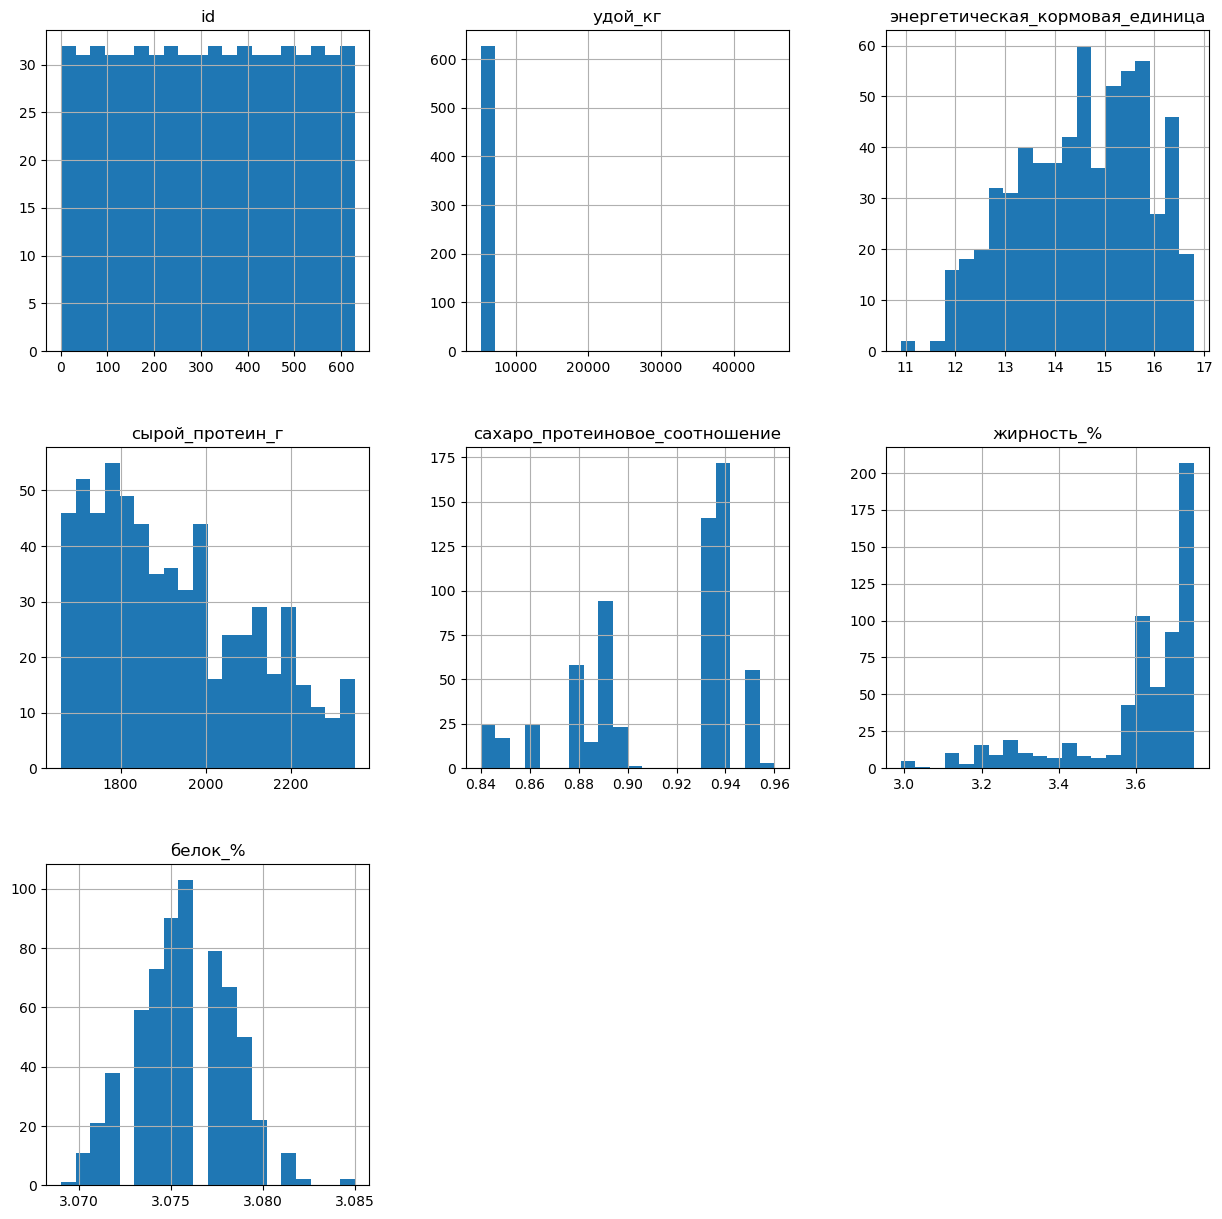

In [13]:
ferma_main.hist (bins = 20, figsize = (15, 15));

На первый взгляд по данным можно сказать, что : 
1. явно есть выбросы в значении удоя
2. Большинство распределений имеют корректные распределения(пройдемся по каждому из них 

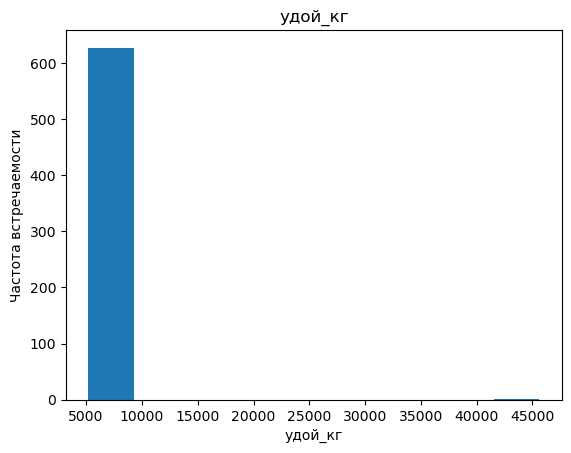

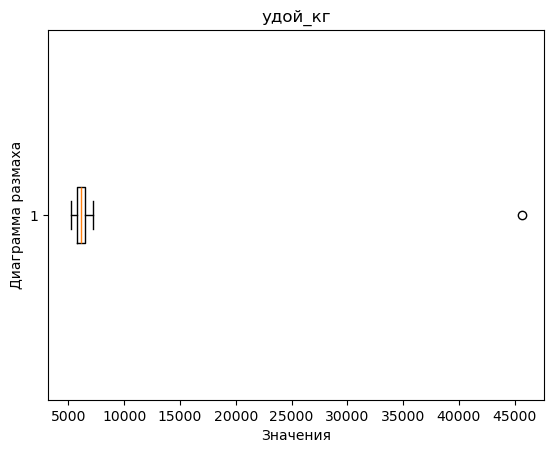

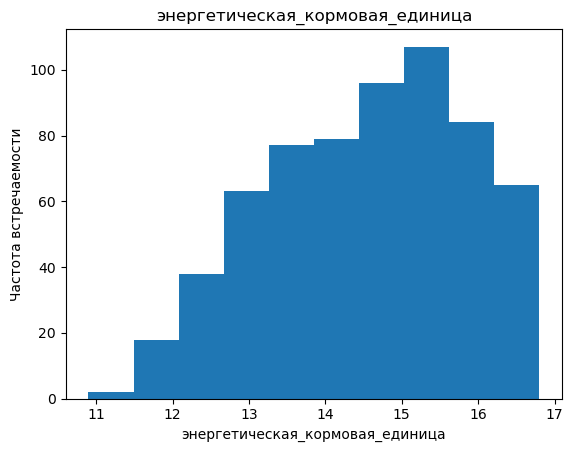

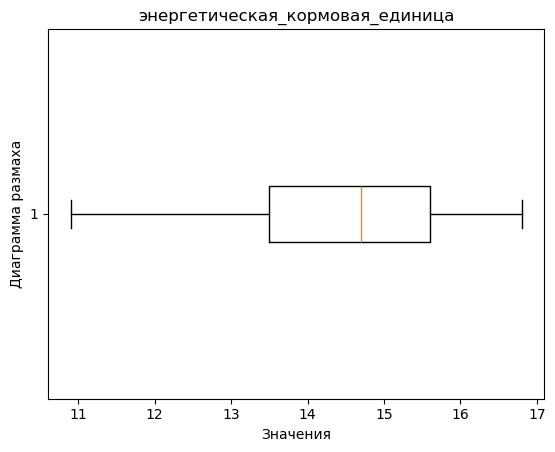

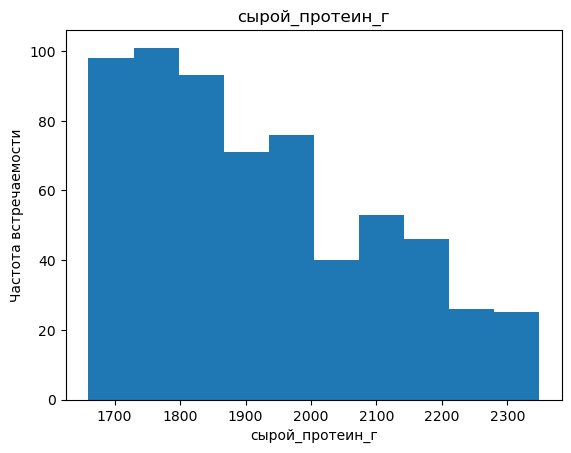

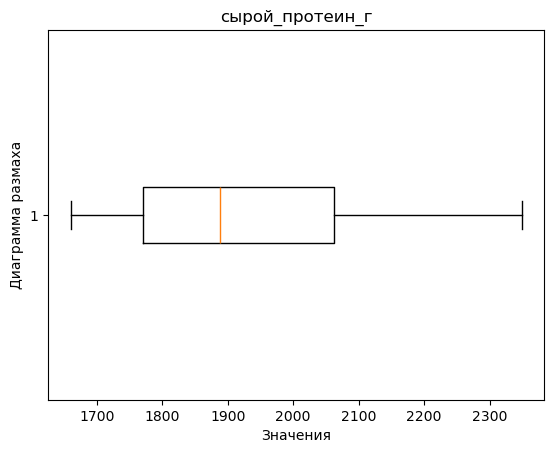

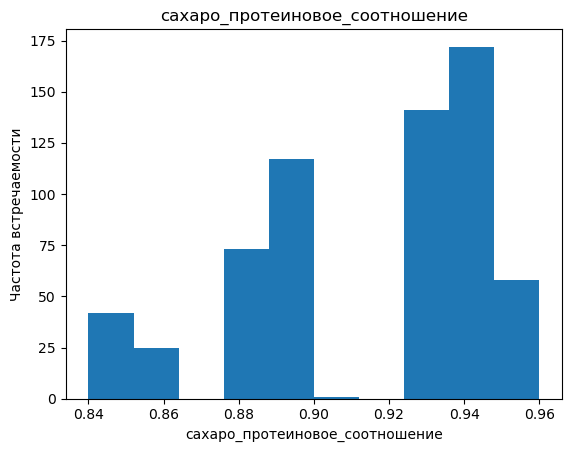

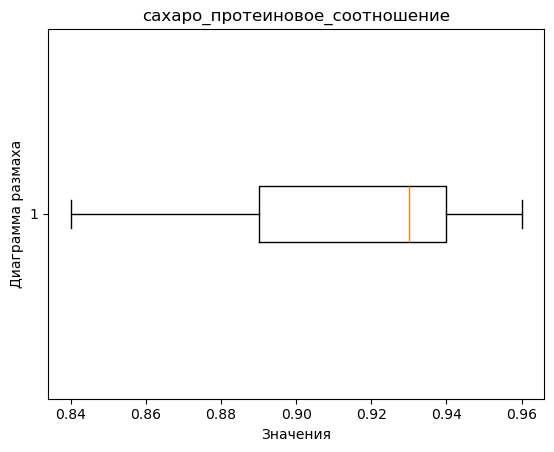

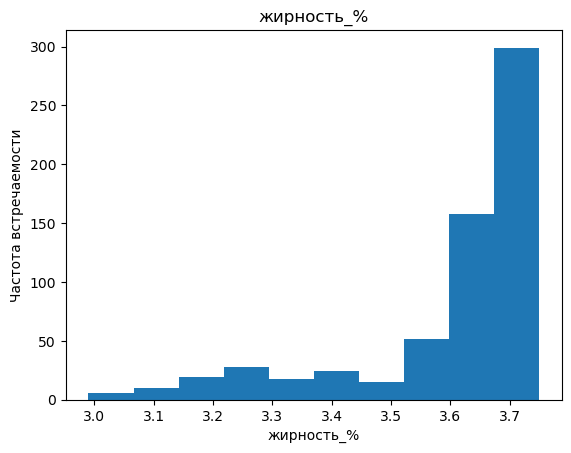

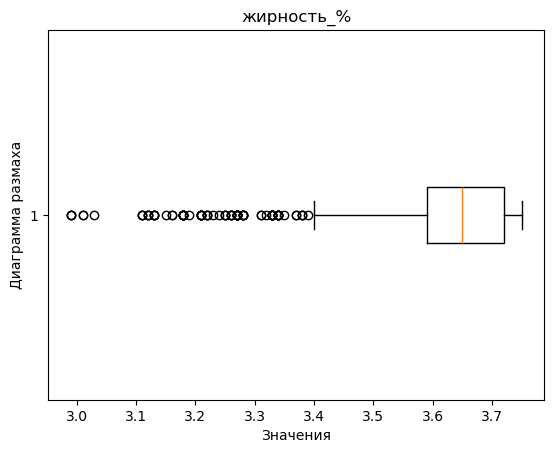

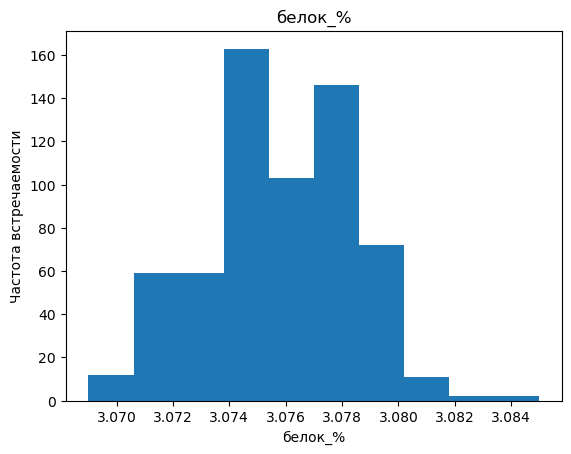

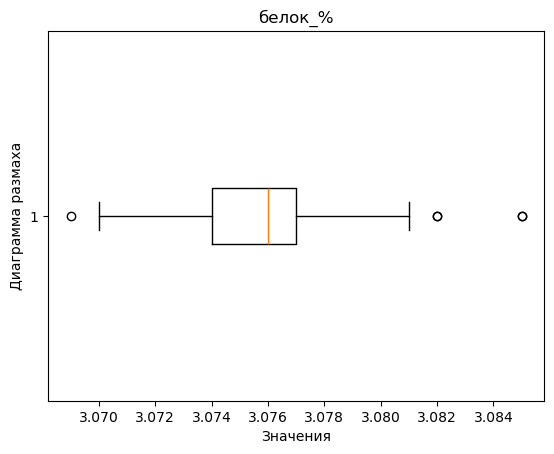

In [14]:
def quantitative_sign (x): 
    for i in x: 
        plt.hist (ferma_main[i])
        plt.title (i)
        plt.xlabel (i)
        plt.ylabel ('Частота встречаемости')
        plt.show ()
        plt.boxplot (ferma_main[i], vert = False)
        plt.title (i)
        plt.xlabel ('Значения')
        plt.ylabel ('Диаграмма размаха')
        plt.show ()
        
quantitative_raw = ['удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение',
                    'жирность_%', 'белок_%']

quantitative_sign(quantitative_raw)

Из построенных значений можно сделать слещующий вывод о качестве данных: 
1. имеется выброс у значения удой, значение 45к, скорее всего в данном значении поставили лишнюю первую цифру
2. энергетическая кормовая единица - все корректно
3. сырой протеин - все корректно
4. сахарно протеиновое соотношение - все корректно 
5. Жирность - считается что имеются выбросы значений < 3.4, для этого необходимо изучить данный датасет подробнее 
6. Белок - показывает что имеется 3 значения выброса. Не критично, значения не сильно отошли от крайних квартилей 

In [15]:
display (ferma_main[ ferma_main ['удой_кг'] > 40000])
extra_earn = ferma_main ['удой_кг'] > 40000
ferma_main.loc[extra_earn, 'удой_кг'] = ferma_main.loc[extra_earn, 'удой_кг'] - 40000
display (ferma_main[ ferma_main ['удой_кг'] > 40000])

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
16  17    45616                             11.5             1675   

    сахаро_протеиновое_соотношение          порода тип_пастбища  \
16                            0.93  Вис Бик Айдиал    Холмистое   

   порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
16           Айдиал        3.22    3.076      вкусно  более_2_лет

Empty DataFrame
Columns: [id, удой_кг, энергетическая_кормовая_единица, сырой_протеин_г, сахаро_протеиновое_соотношение, порода, тип_пастбища, порода_папы_быка, жирность_%, белок_%, вкус_молока, возраст]
Index: []

In [16]:
display (len (ferma_main[ ferma_main ['жирность_%'] < 3.4]))
display ((ferma_main[ ferma_main ['жирность_%'] < 3.4]).head(5))

87

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
5    6     5254                             12.7             1806   
9   10     5339                             13.4             1791   
10  11     5591                             13.7             1678   
16  17     5616                             11.5             1675   
17  18     5777                             12.4             1873   

    сахаро_протеиновое_соотношение           порода тип_пастбища  \
5                            0.885  РефлешнСоверинг    Холмистое   
9                            0.895   Вис Бик Айдиал    Холмистое   
10                           0.895  РефлешнСоверинг    Холмистое   
16                           0.930   Вис Бик Айдиал    Холмистое   
17                           0.895   Вис Бик Айдиал    Холмистое   

   порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
5           Соверин        3.13    3.078      вкусно  менее_2_лет  
9           Соверин        3.13    3.075      вкусно  менее_2_лет  
10           Айдиал        3.13    3.075      вкусно  менее_2_лет  
16           Айдиал        3.22    3.076      вкусно  более_2_лет  
17           Айдиал        3.03    3.080      вкусно  более_2_лет

In [17]:
ferma_main[ ferma_main ['жирность_%'] < 3.4] ['возраст'].value_counts()

возраст
менее_2_лет    52
более_2_лет    35
Name: count, dtype: int64

<Axes: title={'center': 'энергетическая_кормовая_единица'}, xlabel='жирность_%', ylabel='энергетическая_кормовая_единица'>

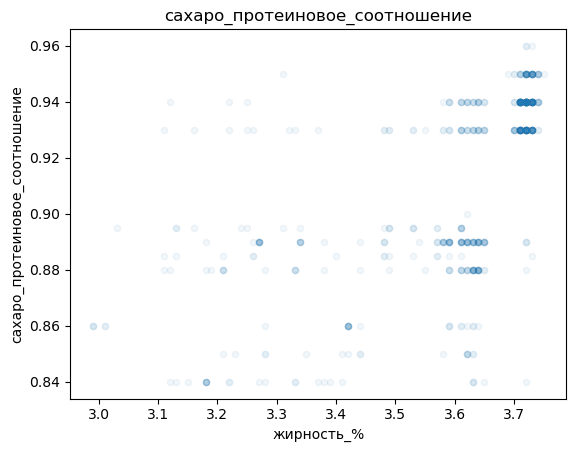

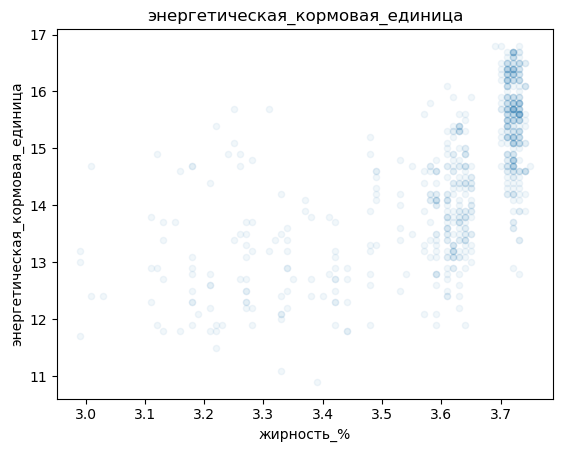

In [18]:
ferma_main.sort_values(by = 'жирность_%').plot (x = 'жирность_%' , y = 'сахаро_протеиновое_соотношение', title = 'сахаро_протеиновое_соотношение',
                                                kind = 'scatter', alpha = 0.06)
ferma_main.sort_values(by = 'жирность_%').plot (x = 'жирность_%' , y = 'энергетическая_кормовая_единица', title = 'энергетическая_кормовая_единица',
                                                kind = 'scatter', alpha = 0.06)

In [19]:
display (ferma_main['сахаро_протеиновое_соотношение'].corr (ferma_main['жирность_%'], method='spearman'))
ferma_main['энергетическая_кормовая_единица'].corr (ferma_main['жирность_%'], method='spearman')

0.6996062198261972

0.6882734829037119

Исходя из всего того что мы сделали, можно сделать вывод что: 
1. Такой критерий как жирность у молодых коров встречается в 1.5 раза чаще по сравнению со старыми
2. Критерий жирность имеет зависимость (согласно критерию Пирсона) с показателями СПО и ЭКЕ

Т.е. ситуация реальная что молодую корову кормили кормом с более низкими показателями по питательности => что такой результат допустим

Кроме того, не понятно как и чем можно заменить эти данные, поэтому оставляем как есть.

In [20]:
def quantitative_describe (x): 
    for i in x: 
        display(i)
        display (ferma_main[i].describe()[['mean', '50%','min', 'max']])

quantitative_describe (quantitative_raw)

'удой_кг'

mean    6125.157393
50%     6132.000000
min     5204.000000
max     7222.000000
Name: удой_кг, dtype: float64

'энергетическая_кормовая_единица'

mean    14.543879
50%     14.700000
min     10.900000
max     16.800000
Name: энергетическая_кормовая_единица, dtype: float64

'сырой_протеин_г'

mean    1923.36407
50%     1888.00000
min     1660.00000
max     2349.00000
Name: сырой_протеин_г, dtype: float64

'сахаро_протеиновое_соотношение'

mean    0.913116
50%     0.930000
min     0.840000
max     0.960000
Name: сахаро_протеиновое_соотношение, dtype: float64

'жирность_%'

mean    3.603657
50%     3.650000
min     2.990000
max     3.750000
Name: жирность_%, dtype: float64

'белок_%'

mean    3.075671
50%     3.076000
min     3.069000
max     3.085000
Name: белок_%, dtype: float64

Исходя из анализа количественных переменных, можно заключить следующее: 
1. Показатель "Удой" - среднее значение = 6123кг медиана = 6132 интервалы = [4561, 7222]
2. Показатель "энергетическая_кормовая_единица" - среднее значение = 14.54 медиана = 14.7 интервалы = [10.9, 16.8]
3. Показатель "сырой_протеин_г" - среднее значение = 1923.3 медиана = 1888 интервалы = [1660, 2349]
4. Показатель "сахаро_протеиновое_соотношение" - среднее значение = 0.91 медиана = 0.93 интервалы = [0.84, 0.96]
5. Показатель "жирность_%" - среднее значение = 3.6 медиана = 3.65 интервалы = [2.99, 3.75]
6. Показатель "белок_%" - среднее значение = 3.075 медиана = 3.076 интервалы = [3.069, 3.085]

### Изучение категориальных признаков

Часть параметров была проанализированна и сделаны соответсвующие выводы. Необходимо провести анализ по следующим показателям: 

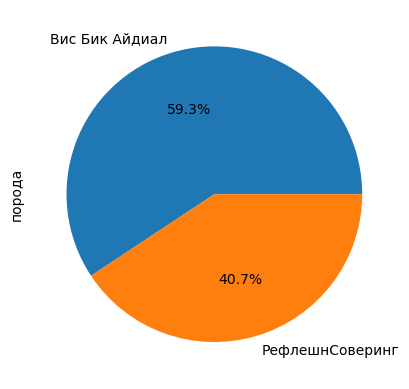

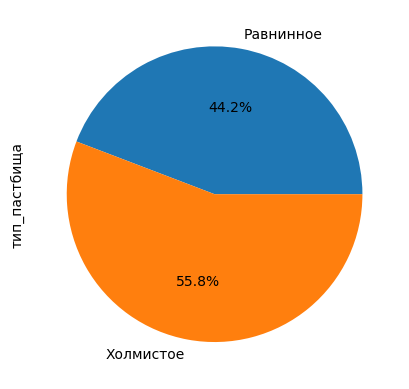

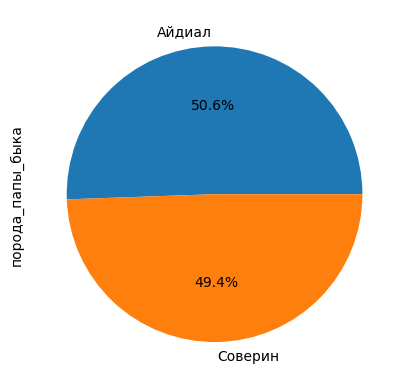

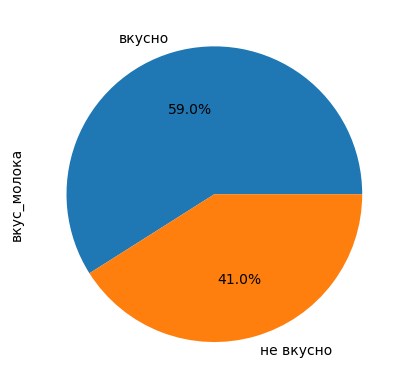

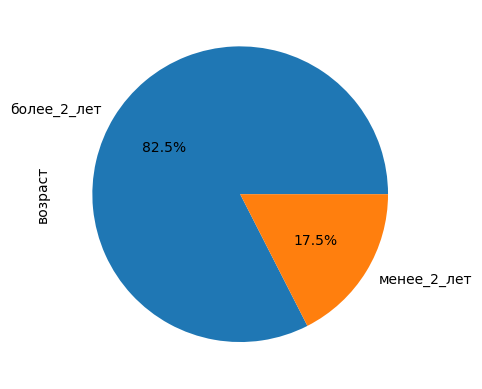

In [21]:
quality_raw = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

def quality_sign (x):
    for i in x:
        (ferma_main
        .groupby (i) [i]
        .count()
        .plot (kind = 'pie',    autopct = '%1.1f%%'))
        plt.title = i
        plt.show()

quality_sign (quality_raw)

По проведению данного анализа можно сделать следующий вывод, что: 
1. доминирующая порода (60%) - Вис Бик Айдиал, остальные 40% - РефлешнСоверинг
2. большая часть коров пасется на пастбище холмистое (56%), остальные - Равнинное
3. Порода папы быка в равной степени Айдиал и Соверин 
4. Вкус молока - у 60% вкусно 
5. 82% коров находятся в возрастной категории >2х лет

Вывод по данному пункту: 

Были устранены выбросы в поле Удой и проведен анализ выбросов в поле жирность решено было не изменять данный показатель

Исходя из анализа количественных переменных, можно заключить следующее: 
1. Показатель "Удой" - среднее значение = 6123кг медиана = 6132 интервалы = [4561, 7222]
2. Показатель "энергетическая_кормовая_единица" - среднее значение = 14.54 медиана = 14.7 интервалы = [10.9, 16.8]
3. Показатель "сырой_протеин_г" - среднее значение = 1923.3 медиана = 1888 интервалы = [1660, 2349]
4. Показатель "сахаро_протеиновое_соотношение" - среднее значение = 0.91 медиана = 0.93 интервалы = [0.84, 0.96]
5. Показатель "жирность_%" - среднее значение = 3.6 медиана = 3.65 интервалы = [2.99, 3.75]
6. Показатель "белок_%" - среднее значение = 3.075 медиана = 3.076 интервалы = [3.069, 3.085]

По проведению данного анализа можно сделать следующий вывод, что: 
1. доминирующая порода (60%) - Вис Бик Айдиал, остальные 40% - РефлешнСоверинг
2. большая часть коров пасется на пастбище холмистое (56%), остальные - Равнинное
3. Порода папы быка в равной степени Айдиал и Соверин 
4. Вкус молока - у 60% вкусно 
5. 82% коров находятся в возрастной категории >2х лет

***Анализ зависимостей между показателями и корреляционных коэф. будет происходить в следующем пункте***

## Корреляционный анализ

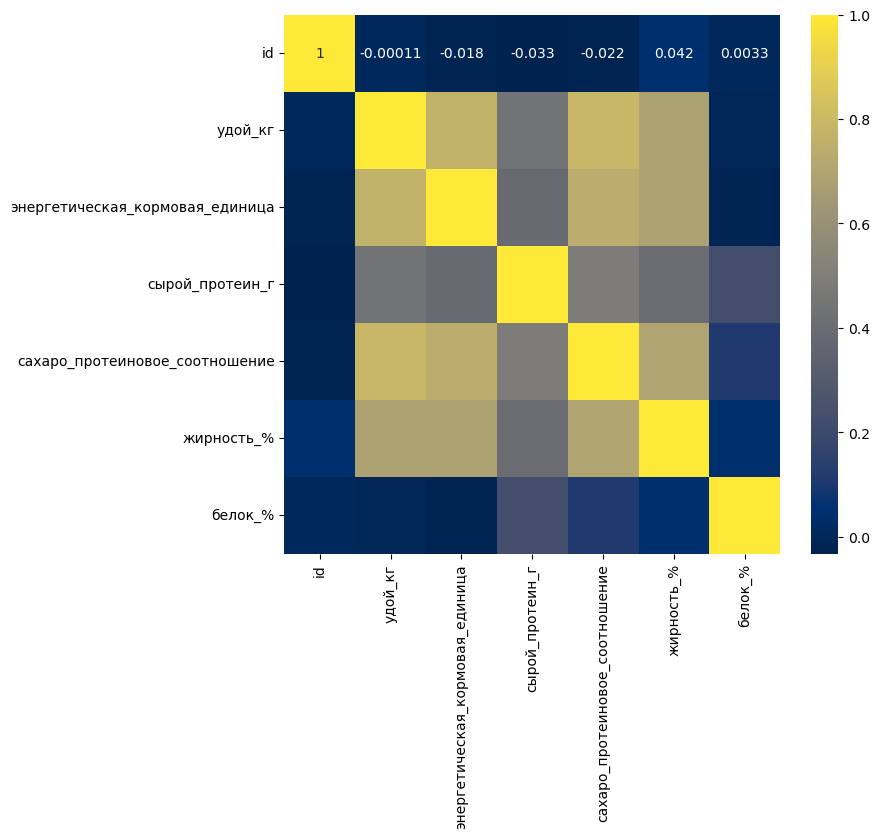

In [22]:
plt.figure (figsize = (8,7))
sns.heatmap (ferma_main.select_dtypes(include = 'number').corr(method='spearman'), annot = True, cmap='cividis')
plt.show()

interval columns not set, guessing: ['id', 'удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение', 'жирность_%', 'белок_%']


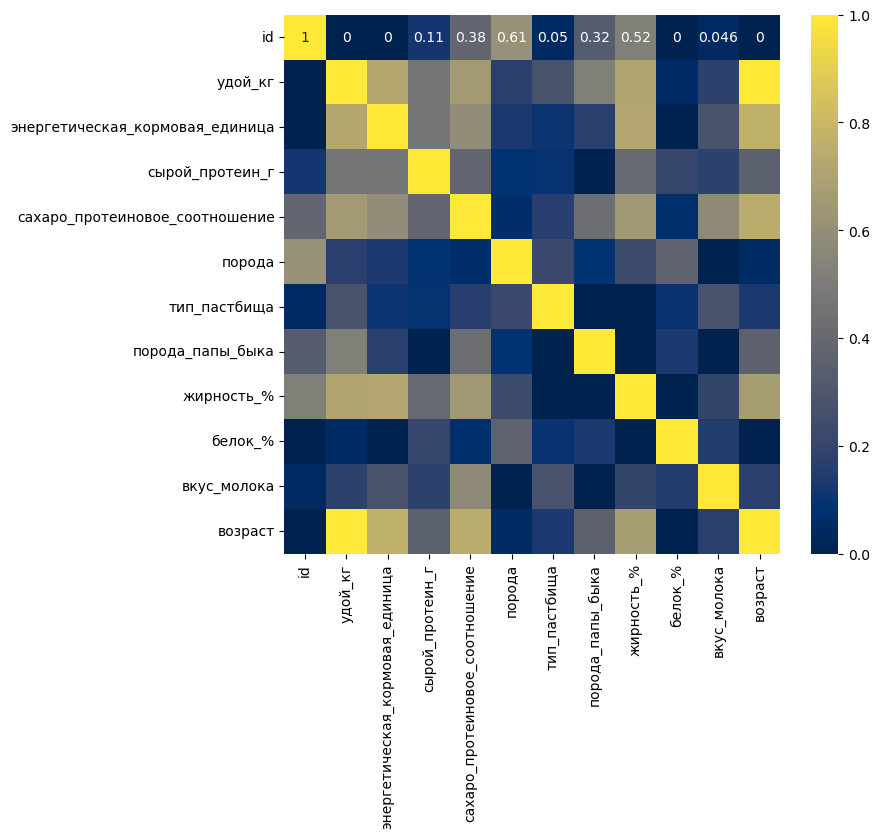

In [23]:
plt.figure (figsize = (8,7))
sns.heatmap (ferma_main.phik_matrix(), annot = True, cmap='cividis')
plt.show()

None

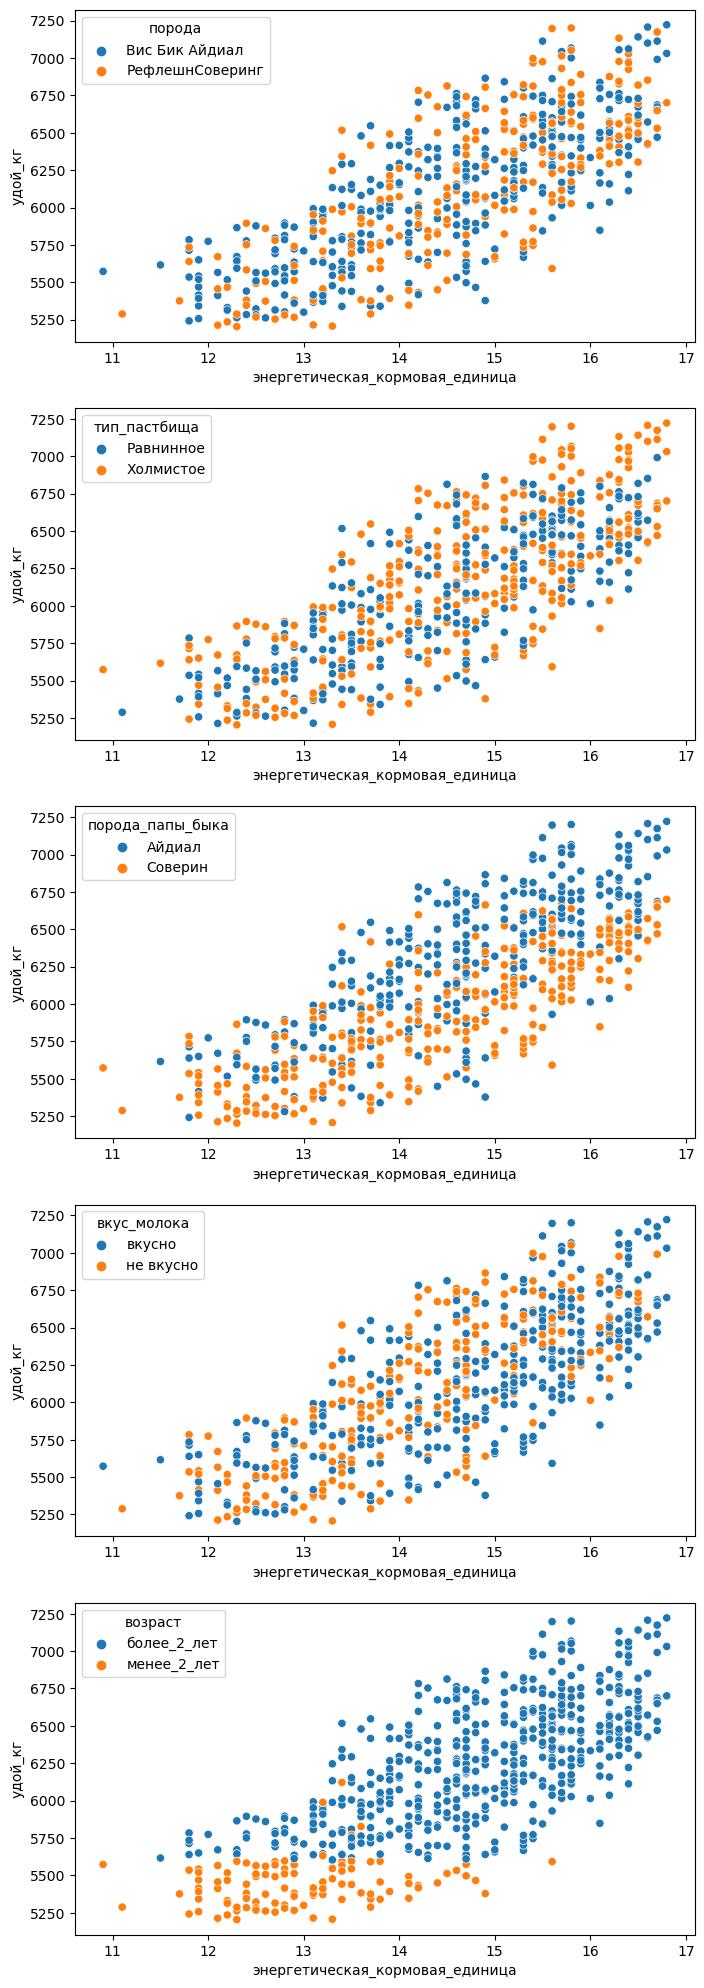

In [24]:
# Построение диаграмм рассеяния
fig, axs = plt.subplots( len(quality_raw), 1, figsize=(8,25))

def scat(ser):
    for ax, col in zip(axs, quality_raw):
        sns.scatterplot(data = ferma_main, x=ser, y='удой_кг', hue=col, ax=ax)

display(scat(ferma_main['энергетическая_кормовая_единица']))


None

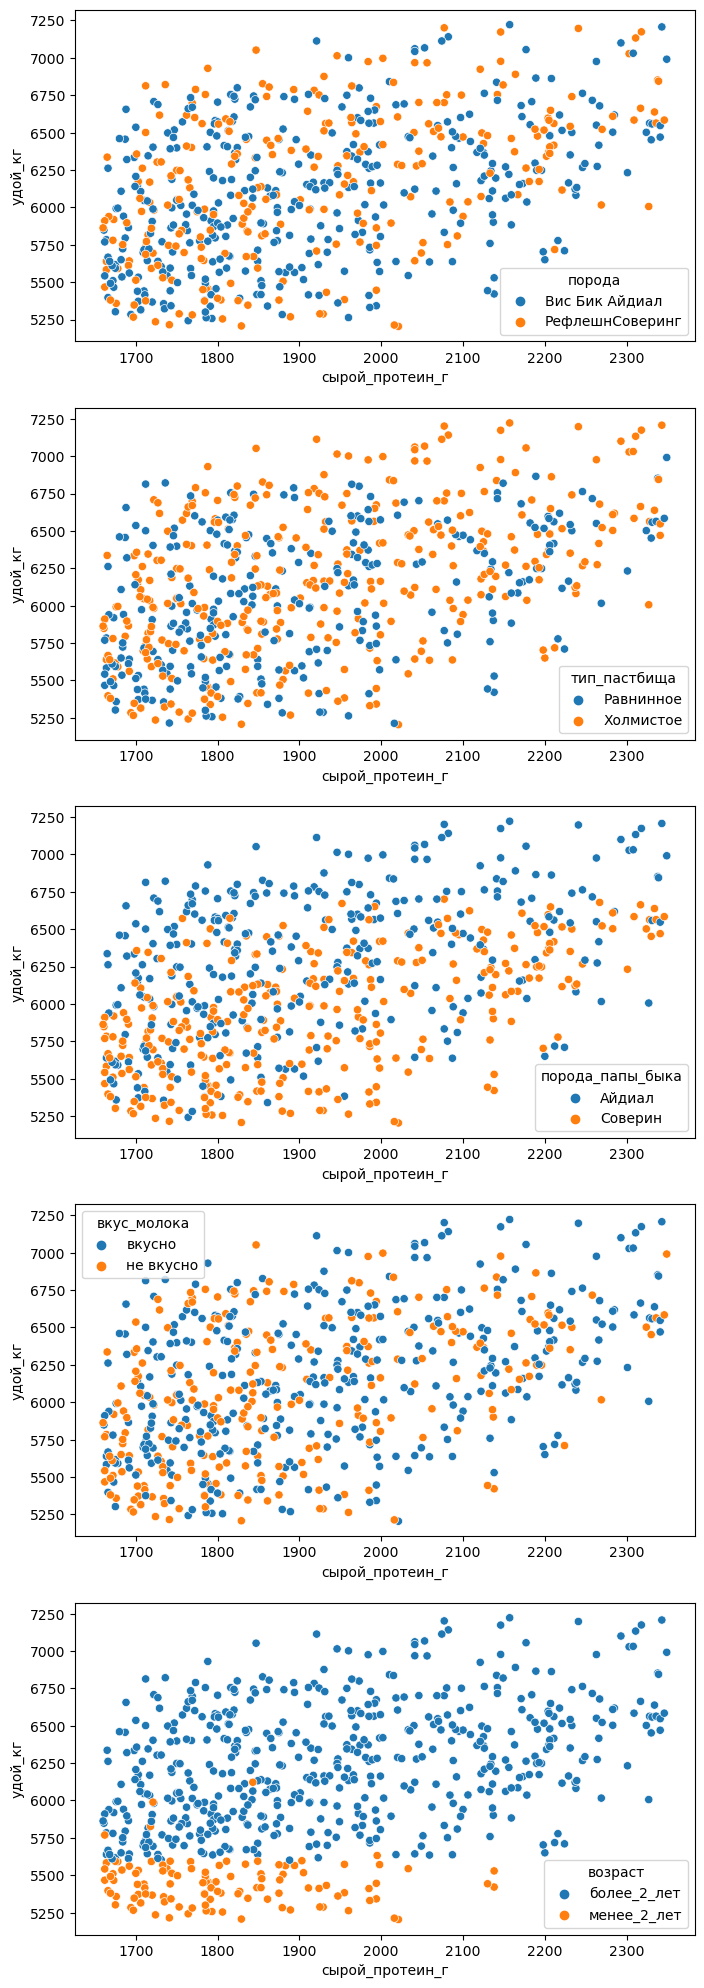

In [25]:
fig, axs = plt.subplots( len(quality_raw), 1, figsize=(8,25))
display(scat(ferma_main['сырой_протеин_г']))

None

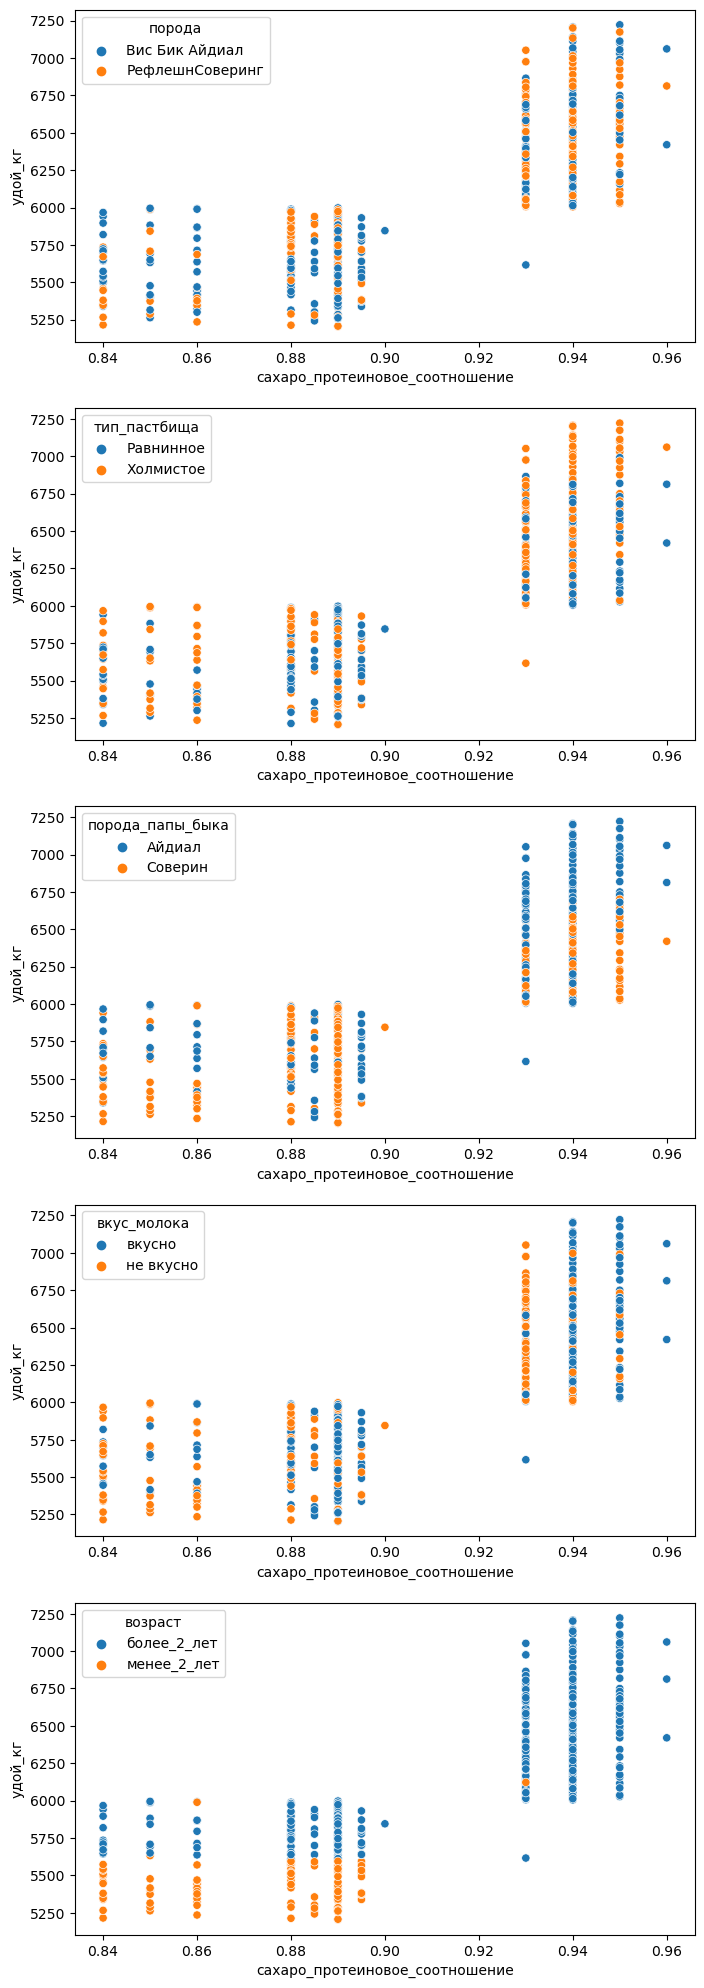

In [26]:
fig, axs = plt.subplots( len(quality_raw), 1, figsize=(8,25))
display(scat(ferma_main['сахаро_протеиновое_соотношение']))

None

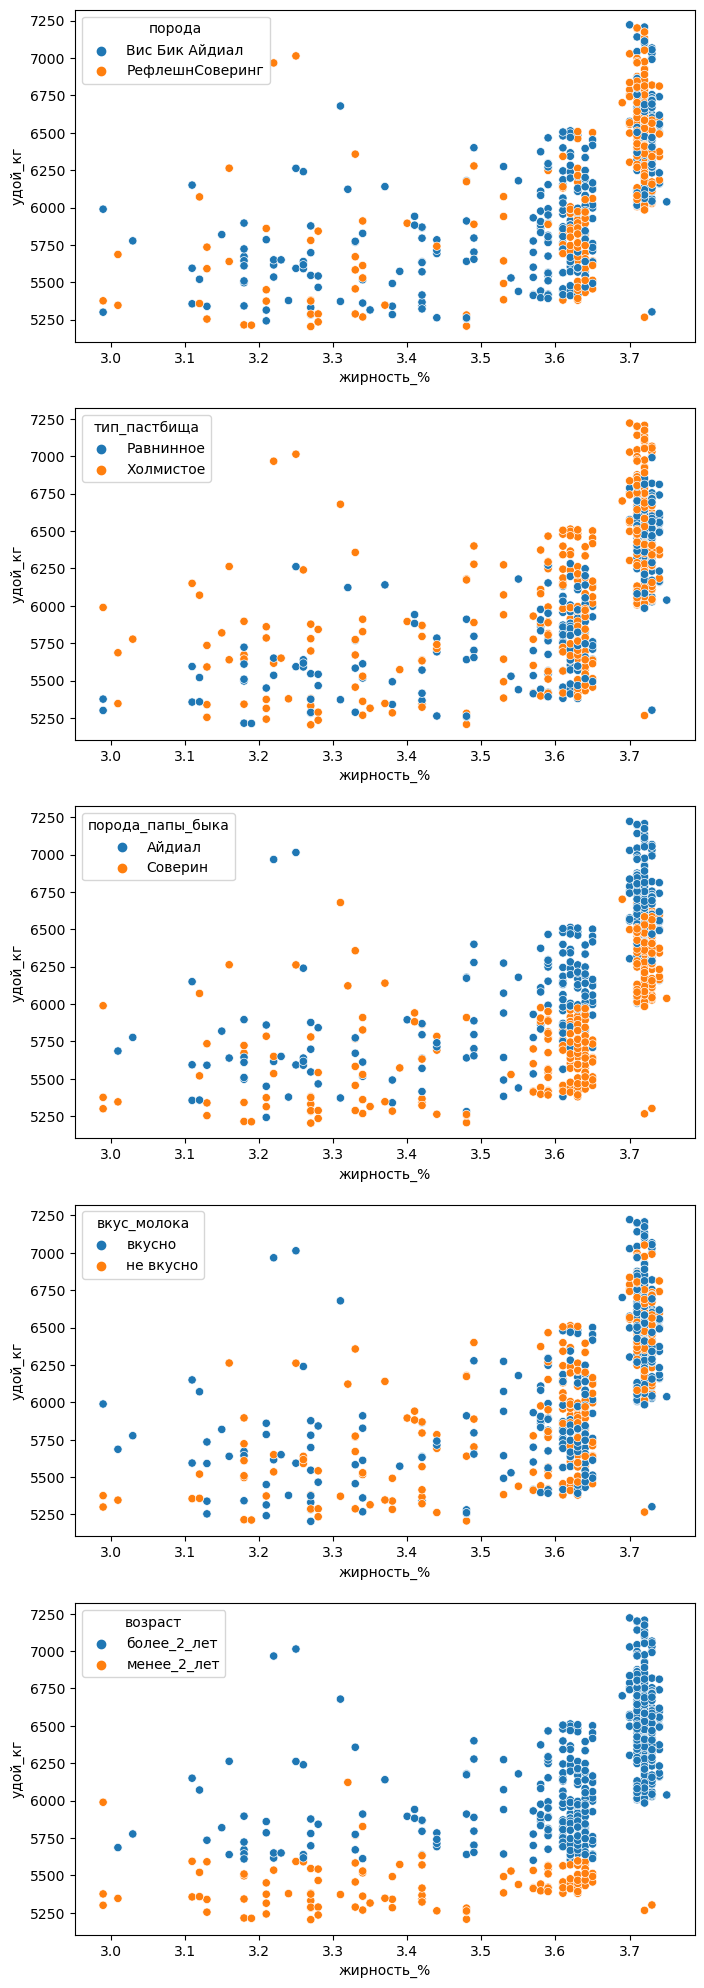

In [27]:
fig, axs = plt.subplots( len(quality_raw), 1, figsize=(8,25))
display(scat(ferma_main['жирность_%']))

None

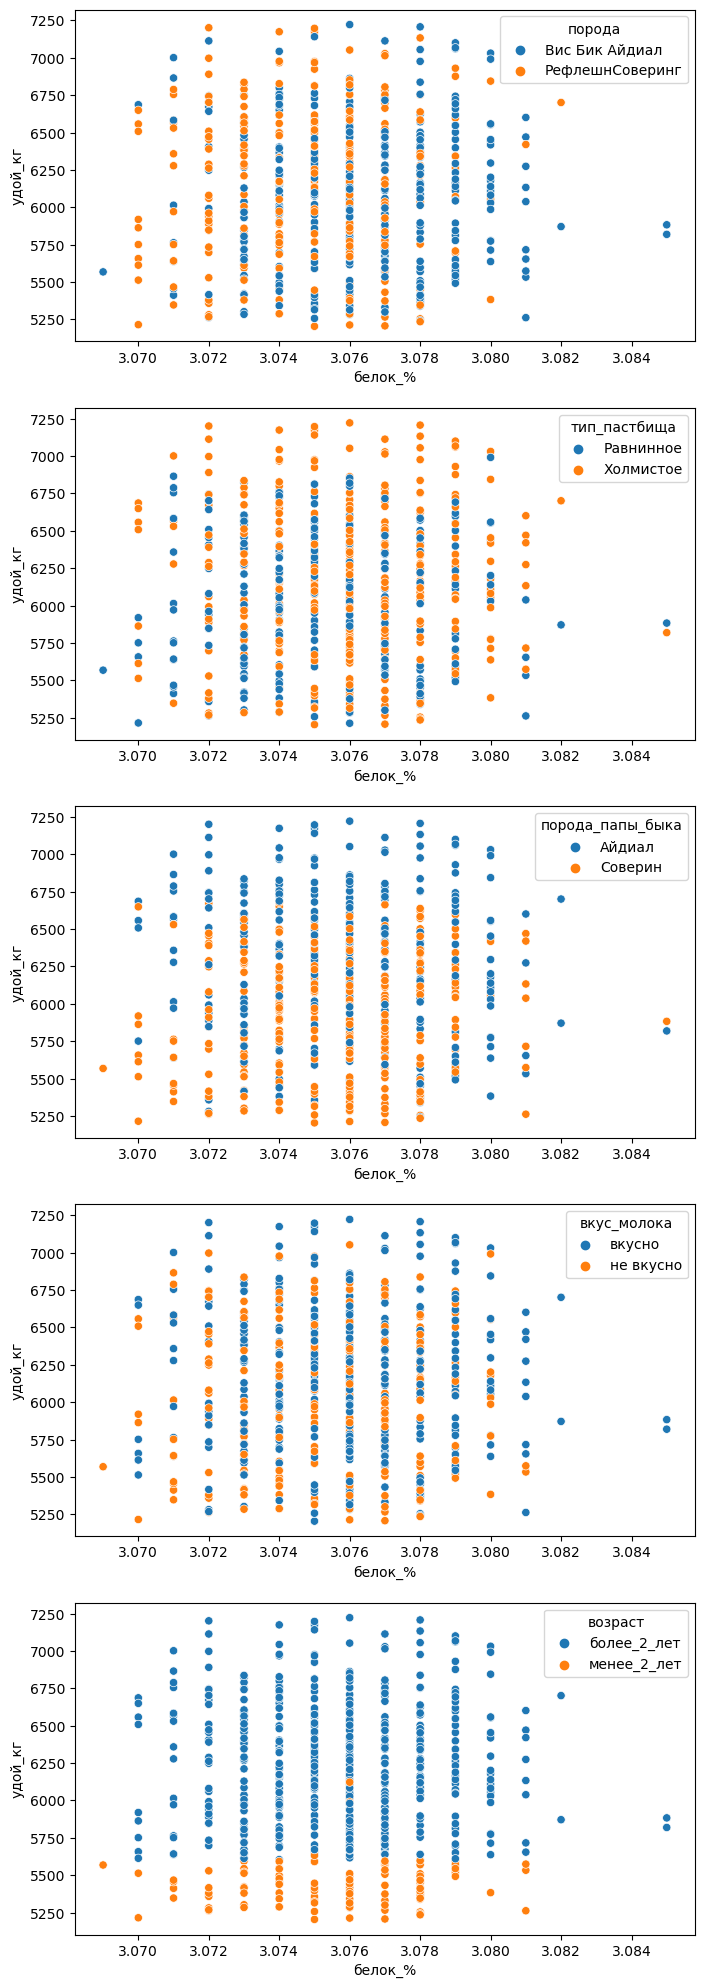

In [28]:
fig, axs = plt.subplots( len(quality_raw), 1, figsize=(8,25))
display(scat(ferma_main['белок_%']))

***Результаты данного пункта***: 

1. Наблюдается линейная зависимость между входными показателями и значением таргет, у следующих : сырой протеин, белок, 
2. Мультиколлинеарности нет, т.к. принято учитывать ее при коэф. свыше 0.9
3. Между показателями Удой - ЭКО наблюдается  U - образная связь, поэтому данный показатель эко можно возвести в квадрат, Удой - СПО четко наблюдается разделение на 2 группы (тенденция к кластеризации) , можно сделать классификацию до и после. 
4. жирность - наблюдается тенденция к кластеризации

## Обучение модели линейной регрессии

### Построение первой модели

In [29]:
ferma_main.head(1)

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                             14.2             1743   

   сахаро_протеиновое_соотношение          порода тип_пастбища  \
0                            0.89  Вис Бик Айдиал    Равнинное   

  порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет

Необходимо отобрать признаки, которые подходят для модели линейной регрессии: 
1. Удой явлется целевым показателем
2. ЭКО - Связь между показателем и таргетом показывает зависимость 
3. Сырой протеин так же не вызывает сомнений в необходимости как один из признаков
4. СПО - избавимся от данного показателя, т.к. данный показатель обладает мультиколлениарностью с ЭКО
5. Порода - необходимый признак
6. Тип пастбища - необходимый признак
7. порода папы быка влияет на значение удоя
8. Жирность и белок в молоке - характеристики самого молока, а не питания коровы. Эти харакетристики зависят от питания, породы итд - и коррелируют с удоем, но не связаны с ним причинно-следственными связями и не влияют на него./
9. Вкус молока можно убрать 
10. Возрас необходимо оставить 

In [30]:
ferma_main_first_model = ferma_main.copy()
ferma_main_first_model = ferma_main_first_model.drop (['сахаро_протеиновое_соотношение', 'вкус_молока'], axis =1 )
ferma_main_first_model.head()

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                             14.2             1743   
1   2     5529                             12.8             2138   
2   3     5810                             14.0             1854   
3   4     5895                             12.4             2012   
4   5     5302                             12.8             1675   

            порода тип_пастбища порода_папы_быка  жирность_%  белок_%  \
0   Вис Бик Айдиал    Равнинное           Айдиал        3.58    3.076   
1   Вис Бик Айдиал    Равнинное          Соверин        3.54    3.079   
2  РефлешнСоверинг    Холмистое          Соверин        3.59    3.074   
3  РефлешнСоверинг    Холмистое           Айдиал        3.40    3.075   
4   Вис Бик Айдиал    Равнинное          Соверин        3.73    3.073   

       возраст  
0  более_2_лет  
1  менее_2_лет  
2  более_2_лет  
3  более_2_лет  
4  менее_2_лет

In [31]:
X_first_model = ferma_main_first_model.drop (['удой_кг'], axis =1 )
y_first_model = ferma_main_first_model ['удой_кг']

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split (
X_first_model,
y_first_model,
random_state = RANDOM_STATE)

# Проверка формы: 

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(471, 9)
(471,)
(158, 9)
(158,)


In [32]:
X_train.head(1)

id  энергетическая_кормовая_единица  сырой_протеин_г          порода  \
612  613                             14.6             1967  Вис Бик Айдиал   

    тип_пастбища порода_папы_быка  жирность_%  белок_%      возраст  
612    Равнинное           Айдиал        3.64     3.08  более_2_лет

Кодирование категориальных переменных: 

In [33]:
num_col_name = ['энергетическая_кормовая_единица', 'сырой_протеин_г']
cat_col_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

In [34]:
encoder = OneHotEncoder (drop = 'first', sparse_output=False)

X_train_ohe = encoder.fit_transform (X_train[cat_col_name])
X_test_ohe = encoder.transform (X_test[cat_col_name])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)


Масштабирование количественных признаков:

In [35]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform (X_train[num_col_name])
X_test_scaler = scaler.transform (X_test[num_col_name])

X_train_scaled = pd.DataFrame(X_train_scaler, columns = num_col_name)
X_test_scaled = pd.DataFrame(X_test_scaler, columns = num_col_name)

In [36]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [37]:
model_lr  = LinearRegression()
model_lr.fit (X_train, y_train)
predictions = model_lr.predict (X_test)

Оценка качества модели
Расчет коэф. детерминации:

In [38]:
r2 = r2_score(y_test, predictions)  
r2

0.7833463761955626

Анализ остатков: 

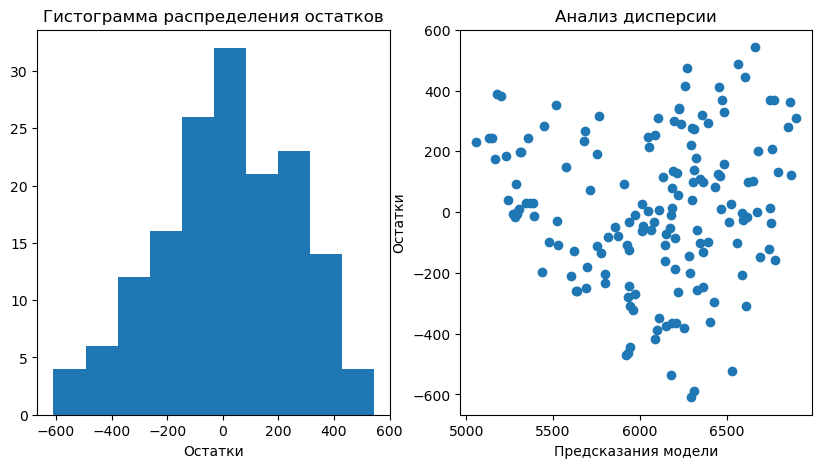

In [39]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions , y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Выводы

1. Коэффициент детерминации = 0,783, что является хорошим результатом, чем ближе к 1 тем точнее модель предсказывает данные
2. из анализа остатков можно сделать следующие выводы, что остатки распределены нормально, гистограмма симетрична относительно 0
3. Анализ дисперсии показывает что модель ошибается чаще и с большим разбросом на значениях ближе к верхней границе дойки 
4. Нужно дополнительное исследование или параметр, который будет дополнительно помогать в определении прогнозируемой добычи молока

**Создадим функцию для посчета MSE, RMSE, MAE (задание пункта 5.5)**

In [40]:
def metric (name_model, y_test, pred):
    mse = mean_squared_error (y_test, pred)
    rmse = mean_squared_error (y_test, pred, squared = False)
    mae = mean_absolute_error (y_test, pred)
    model_number = [name_model, mse, rmse, mae]
    return model_number
    
first_model_metric = metric('first_model', y_test, predictions)

C:\Users\nssavinov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Построение второй модели

Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. 

Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.


Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

In [41]:
# Создадим ещё один датасет 

ferma_main_second_model = ferma_main.copy()
ferma_main_second_model = ferma_main_second_model.drop (['вкус_молока'], axis =1 )

Для того чтобы устранить нелинейность в СПО заменим категориальными переменными, СПО до значения 0.92 будет "Низкое", а выше "высокое" 

In [42]:
low_concentration = ferma_main_second_model['сахаро_протеиновое_соотношение'] < 0.92
high_concentration = ferma_main_second_model['сахаро_протеиновое_соотношение'] >= 0.92
ferma_main_second_model.loc [low_concentration, 'сахаро_протеиновое_соотношение'] = 'Низкое'
ferma_main_second_model.loc [high_concentration, 'сахаро_протеиновое_соотношение'] = 'Высокое'
ferma_main_second_model.head(10)

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_12388\1450811821.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Низкое' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ferma_main_second_model.loc [low_concentration, 'сахаро_протеиновое_соотношение'] = 'Низкое'


id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                             14.2             1743   
1   2     5529                             12.8             2138   
2   3     5810                             14.0             1854   
3   4     5895                             12.4             2012   
4   5     5302                             12.8             1675   
5   6     5254                             12.7             1806   
6   7     5910                             13.2             1792   
7   8     6179                             14.7             1806   
8   9     6783                             14.2             1918   
9  10     5339                             13.4             1791   

  сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                         Низкое   Вис Бик Айдиал    Равнинное   
1                         Низкое   Вис Бик Айдиал    Равнинное   
2                         Низкое  РефлешнСоверинг    Холмистое   
3                         Низкое  РефлешнСоверинг    Холмистое   
4                         Низкое   Вис Бик Айдиал    Равнинное   
5                         Низкое  РефлешнСоверинг    Холмистое   
6                         Низкое   Вис Бик Айдиал    Равнинное   
7                        Высокое   Вис Бик Айдиал    Равнинное   
8                        Высокое  РефлешнСоверинг    Холмистое   
9                         Низкое   Вис Бик Айдиал    Холмистое   

  порода_папы_быка  жирность_%  белок_%      возраст  
0           Айдиал        3.58    3.076  более_2_лет  
1          Соверин        3.54    3.079  менее_2_лет  
2          Соверин        3.59    3.074  более_2_лет  
3           Айдиал        3.40    3.075  более_2_лет  
4          Соверин        3.73    3.073  менее_2_лет  
5          Соверин        3.13    3.078  менее_2_лет  
6          Соверин        3.48    3.077  более_2_лет  
7           Айдиал        3.55    3.076  более_2_лет  
8           Айдиал        3.71    3.077  более_2_лет  
9          Соверин        3.13    3.075  менее_2_лет

 Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [43]:
ferma_main_second_model['энергетическая_кормовая_единица'] = ferma_main_second_model['энергетическая_кормовая_единица'] **2
ferma_main_second_model.head(10)

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                           201.64             1743   
1   2     5529                           163.84             2138   
2   3     5810                           196.00             1854   
3   4     5895                           153.76             2012   
4   5     5302                           163.84             1675   
5   6     5254                           161.29             1806   
6   7     5910                           174.24             1792   
7   8     6179                           216.09             1806   
8   9     6783                           201.64             1918   
9  10     5339                           179.56             1791   

  сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                         Низкое   Вис Бик Айдиал    Равнинное   
1                         Низкое   Вис Бик Айдиал    Равнинное   
2                         Низкое  РефлешнСоверинг    Холмистое   
3                         Низкое  РефлешнСоверинг    Холмистое   
4                         Низкое   Вис Бик Айдиал    Равнинное   
5                         Низкое  РефлешнСоверинг    Холмистое   
6                         Низкое   Вис Бик Айдиал    Равнинное   
7                        Высокое   Вис Бик Айдиал    Равнинное   
8                        Высокое  РефлешнСоверинг    Холмистое   
9                         Низкое   Вис Бик Айдиал    Холмистое   

  порода_папы_быка  жирность_%  белок_%      возраст  
0           Айдиал        3.58    3.076  более_2_лет  
1          Соверин        3.54    3.079  менее_2_лет  
2          Соверин        3.59    3.074  более_2_лет  
3           Айдиал        3.40    3.075  более_2_лет  
4          Соверин        3.73    3.073  менее_2_лет  
5          Соверин        3.13    3.078  менее_2_лет  
6          Соверин        3.48    3.077  более_2_лет  
7           Айдиал        3.55    3.076  более_2_лет  
8           Айдиал        3.71    3.077  более_2_лет  
9          Соверин        3.13    3.075  менее_2_лет

Теперь повторим действия которые были сделаны при построении первой модели: 
1. выделим категориальные и количественные переменные
2. Метод OHE & Scaler
3. обучение модели, получение результатов

In [44]:
num_col_name = ['энергетическая_кормовая_единица', 'сырой_протеин_г']
cat_col_name = ['сахаро_протеиновое_соотношение', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

In [45]:
X_train_second_model = ferma_main_second_model.drop('удой_кг', axis = 1)
y_train_second_model = ferma_main_second_model['удой_кг']

X_train, X_test, y_train, y_test = train_test_split (
X_train_second_model,
y_train_second_model,
random_state = RANDOM_STATE)

display (X_train.shape)
display (X_test.shape)
display (y_train.shape)
display (y_test.shape)

(471, 10)

(158, 10)

(471,)

(158,)

In [46]:
encoder = OneHotEncoder (drop = 'first', sparse_output=False)

X_train_ohe = encoder.fit_transform (X_train[cat_col_name])
X_test_ohe = encoder.transform (X_test[cat_col_name])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)


In [47]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform (X_train[num_col_name])
X_test_scaler = scaler.transform (X_test[num_col_name])

X_train_scaled = pd.DataFrame(X_train_scaler, columns = num_col_name)
X_test_scaled = pd.DataFrame(X_test_scaler, columns = num_col_name)

In [48]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [49]:
model_lr_second  = LinearRegression()
model_lr_second.fit (X_train, y_train)
predictions = model_lr_second.predict (X_test)

In [50]:
r2 = r2_score(y_test, predictions)  
r2

0.8440612517381652

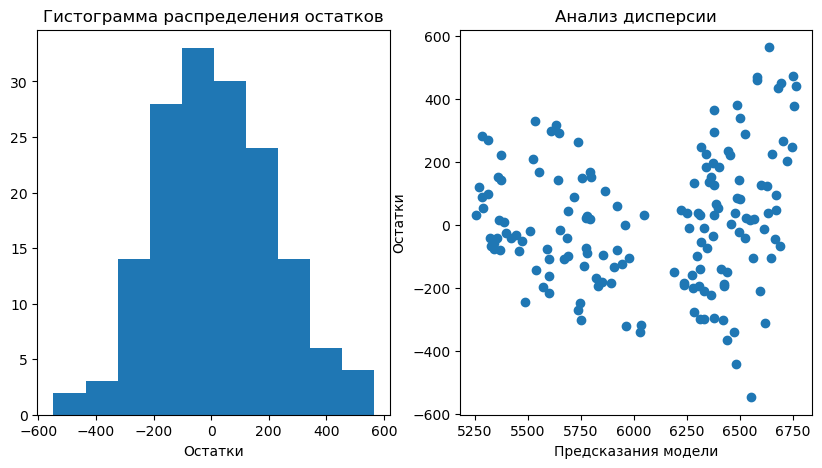

In [51]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions , y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Создадим функцию для посчета MSE, RMSE, MAE (задание пункта 5.5)

In [52]:
second_model_metric = metric('second_model', y_test, predictions)

C:\Users\nssavinov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Выводы

1. Коэффициент детерминации = 0,85, что является лучшим результатом по сравнению с 1 моделью, чем ближе к 1 тем точнее модель предсказывает данные
2. из анализа остатков можно сделать следующие выводы, что остатки распределены нормально, гистограмма симетрична относительно 0, остатки стали ближе к 0 отклонений меньше
3. Анализ дисперсии показывает что модель реже ошибается к целевому значению Т.е. 6к кг 
4. Нужно дополнительное исследование или параметр, который будет дополнительно помогать в определении прогнозируемой добычи молока

### Построение третьей модели

Добавьте в данные новый признак и обучите на них третью модель LinearRegression.

Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
Устраните нелинейность между признаками.

Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

In [53]:
ferma_main_third_model = ferma_main_second_model.copy()
ferma_main_third_model = pd.merge(ferma_main_third_model, ferma_dad, left_on = 'id', right_on = 'id')
ferma_main_third_model

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
0      1     5863                           201.64             1743   
1      2     5529                           163.84             2138   
2      3     5810                           196.00             1854   
3      4     5895                           153.76             2012   
4      5     5302                           163.84             1675   
..   ...      ...                              ...              ...   
624  625     6812                           237.16             1964   
625  626     5513                           166.41             1700   
626  627     5970                           207.36             1837   
627  628     5746                           190.44             1994   
628  629     6503                           262.44             2283   

    сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                           Низкое   Вис Бик Айдиал    Равнинное   
1                           Низкое   Вис Бик Айдиал    Равнинное   
2                           Низкое  РефлешнСоверинг    Холмистое   
3                           Низкое  РефлешнСоверинг    Холмистое   
4                           Низкое   Вис Бик Айдиал    Равнинное   
..                             ...              ...          ...   
624                        Высокое  РефлешнСоверинг    Равнинное   
625                         Низкое  РефлешнСоверинг    Равнинное   
626                         Низкое  РефлешнСоверинг    Холмистое   
627                         Низкое  РефлешнСоверинг    Равнинное   
628                        Высокое   Вис Бик Айдиал    Холмистое   

    порода_папы_быка  жирность_%  белок_%      возраст  имя_папы  
0             Айдиал        3.58    3.076  более_2_лет    Буйный  
1            Соверин        3.54    3.079  менее_2_лет  Соловчик  
2            Соверин        3.59    3.074  более_2_лет     Барин  
3             Айдиал        3.40    3.075  более_2_лет    Буйный  
4            Соверин        3.73    3.073  менее_2_лет     Барин  
..               ...         ...      ...          ...       ...  
624           Айдиал        3.74    3.075  более_2_лет    Буйный  
625          Соверин        3.64    3.073  менее_2_лет     Барин  
626          Соверин        3.64    3.075  более_2_лет     Барин  
627          Соверин        3.64    3.077  более_2_лет     Барин  
628          Соверин        3.71    3.076  более_2_лет  Соловчик  

[629 rows x 12 columns]

Из всех оставшихся параметров наблюдается нелинейность в параметре жирность. Изучив датасет можно придти к выводу что необходимо разделить на группы. 
Высокая > 3.675
низкая < 3.5 
Срденяя остальное

In [54]:
high_fat = ferma_main_third_model['жирность_%'] > 3.675
low_fat= ferma_main_third_model['жирность_%'] < 3.5
middle_fat = (~high_fat) & (~low_fat)
ferma_main_third_model.loc [high_fat, 'жирность_%'] = 'Высокая'
ferma_main_third_model.loc [middle_fat, 'жирность_%'] = 'Средняя'
ferma_main_third_model.loc [low_fat, 'жирность_%'] = 'Низкая'
ferma_main_third_model['жирность_%'].value_counts()

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_12388\2244168989.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Высокая' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ferma_main_third_model.loc [high_fat, 'жирность_%'] = 'Высокая'


жирность_%
Высокая    299
Средняя    210
Низкая     120
Name: count, dtype: int64

Повторяем процесс обучения модели

In [55]:
num_col_name = ['энергетическая_кормовая_единица', 'сырой_протеин_г',  'белок_%']
cat_col_name = ['сахаро_протеиновое_соотношение', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст',
                'жирность_%', 'имя_папы']

In [56]:
X_train_third_model = ferma_main_third_model.drop('удой_кг', axis = 1)
y_train_third_model = ferma_main_third_model['удой_кг']

X_train, X_test, y_train, y_test = train_test_split (
X_train_third_model,
y_train_third_model,
random_state = RANDOM_STATE)

display (X_train.shape)
display (X_test.shape)
display (y_train.shape)
display (y_test.shape)

(471, 11)

(158, 11)

(471,)

(158,)

In [57]:
encoder = OneHotEncoder (drop = 'first', sparse_output=False)

X_train_ohe = encoder.fit_transform (X_train[cat_col_name])
X_test_ohe = encoder.transform (X_test[cat_col_name])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)


In [58]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform (X_train[num_col_name])
X_test_scaler = scaler.transform (X_test[num_col_name])

X_train_scaled = pd.DataFrame(X_train_scaler, columns = num_col_name)
X_test_scaled = pd.DataFrame(X_test_scaler, columns = num_col_name)

In [59]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [60]:
model_lr_third  = LinearRegression()
model_lr_third.fit (X_train, y_train)
predictions = model_lr_third.predict (X_test)

In [61]:
r2 = r2_score(y_test, predictions)  
r2

0.8789924387338043

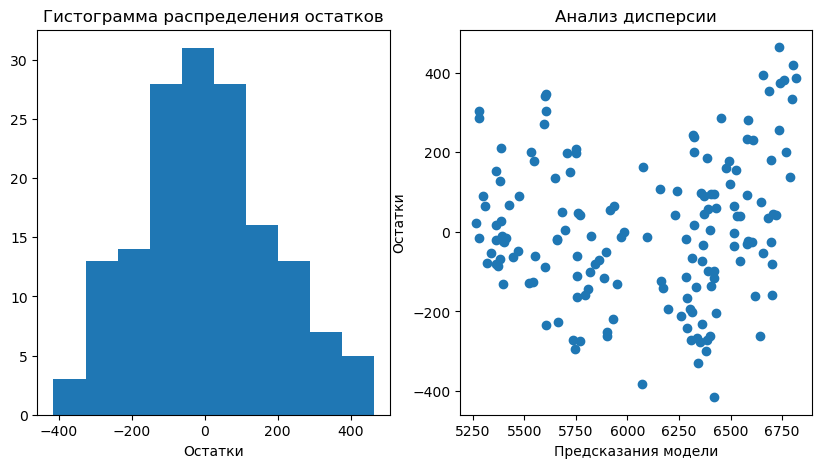

In [62]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions , y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Создадим функцию для посчета MSE, RMSE, MAE (задание пункта 5.5)

In [63]:
third_model_metric = metric('third_model', y_test, predictions)

C:\Users\nssavinov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Выводы

1. Коэффициент детерминации = 0,88, что является лучшим результатом, чем ближе к 1 тем точнее модель предсказывает данные
2. из анализа остатков можно сделать следующие выводы, что остатки распределены нормально, гистограмма симетрична относительно 0
3. Анализ дисперсии показывает что модель стала реже ошибаться на больших данных

### Оценка качества моделей

После проведенного анализа, по R2 и анализам остатков можно сделать вывод, что 3 модель наилучшим образом прогнозирует данные по удою. 

### Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE.

Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.

Выберите лучшую модель;

Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.

In [64]:
common_metrics = []

common_metrics.append(first_model_metric)
common_metrics.append(second_model_metric)
common_metrics.append(third_model_metric)

In [65]:
columns = ['Модель', 'MSE', 'RMSE', 'MAE']
metrics = pd.DataFrame(common_metrics, columns = columns)
metrics

Модель           MSE        RMSE         MAE
0   first_model  59366.520084  243.652458  196.055768
1  second_model  42729.683759  206.711596  164.117416
2   third_model  33157.985959  182.093344  145.457226

Исходя из результатов полученных по данным метрикам, можно сделать вывод, что 3я модель является наиболее оптимальной для прогнозирования показателей. 

Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.

In [66]:
display (f"Нижний интервал: {np.quantile(residuals,0)}")
display (f"Верхний интервал: {np.quantile(residuals,1)}")

'Нижний интервал: -415.3920386379423'

'Верхний интервал: 463.6366203525231'

### С помощью лучшей модели спрогнозируйте удой коров

Kоторых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.

Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.

Получите прогноз удоя коров.

In [67]:
cow_buy['энергетическая_кормовая_единица'] = ferma_main['энергетическая_кормовая_единица'].mean()*1.05
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean()*1.05
cow_buy['сахаро_протеиновое_соотношение'] = ferma_main['сахаро_протеиновое_соотношение'].mean()*1.05
cow_buy = cow_buy.reindex (columns = ['энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение',
                                     'порода', 'тип_пастбища', 'порода_папы_быка', 'текущая_жирность_%', 'текущий_уровень_белок_%',
                                     'возраст', 'имя_папы'])

In [68]:
low_concentration_buy = cow_buy['сахаро_протеиновое_соотношение'] < 0.92
high_concentration_buy = cow_buy['сахаро_протеиновое_соотношение'] >= 0.92
cow_buy.loc [low_concentration, 'сахаро_протеиновое_соотношение'] = 'Низкое'
cow_buy.loc [high_concentration, 'сахаро_протеиновое_соотношение'] = 'Высокое'

cow_buy['энергетическая_кормовая_единица'] = cow_buy['энергетическая_кормовая_единица'] **2

high_fat = cow_buy['текущая_жирность_%'] > 3.675
low_fat= cow_buy['текущая_жирность_%'] < 3.5
middle_fat = (~high_fat) & (~low_fat)
cow_buy.loc [high_fat, 'текущая_жирность_%'] = 'Высокая'
cow_buy.loc [middle_fat, 'текущая_жирность_%'] = 'Средняя'
cow_buy.loc [low_fat, 'текущая_жирность_%'] = 'Низкая'

cow_buy.loc[ cow_buy['тип_пастбища'] == 'холмистое', 'тип_пастбища'] = 'Холмистое'
cow_buy.loc[ cow_buy['тип_пастбища'] == 'равнинное', 'тип_пастбища'] = 'Равнинное'
cow_buy

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_12388\2478465118.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Низкое' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cow_buy.loc [low_concentration, 'сахаро_протеиновое_соотношение'] = 'Низкое'
C:\Users\nssavinov\AppData\Local\Temp\ipykernel_12388\2478465118.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Высокая' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cow_buy.loc [high_fat, 'текущая_жирность_%'] = 'Высокая'


энергетическая_кормовая_единица  сырой_протеин_г  \
0                        233.205675      2019.532273   
1                        233.205675      2019.532273   
2                        233.205675      2019.532273   
3                        233.205675      2019.532273   
4                        233.205675      2019.532273   
5                        233.205675      2019.532273   
7                        233.205675      2019.532273   
9                        233.205675      2019.532273   
10                       233.205675      2019.532273   
11                       233.205675      2019.532273   
12                       233.205675      2019.532273   
13                       233.205675      2019.532273   
15                       233.205675      2019.532273   
16                       233.205675      2019.532273   
17                       233.205675      2019.532273   
18                       233.205675      2019.532273   

   сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                          Низкое   Вис Бик Айдиал    Холмистое   
1                          Низкое   Вис Бик Айдиал    Равнинное   
2                          Низкое  РефлешнСоверинг    Равнинное   
3                          Низкое  РефлешнСоверинг    Холмистое   
4                          Низкое  РефлешнСоверинг    Равнинное   
5                          Низкое  РефлешнСоверинг    Равнинное   
7                         Высокое   Вис Бик Айдиал    Равнинное   
9                          Низкое  РефлешнСоверинг    Холмистое   
10                         Низкое   Вис Бик Айдиал    Холмистое   
11                        Высокое  РефлешнСоверинг    Равнинное   
12                        Высокое   Вис Бик Айдиал    Холмистое   
13                        Высокое   Вис Бик Айдиал    Холмистое   
15                        Высокое  РефлешнСоверинг    Холмистое   
16                        Высокое   Вис Бик Айдиал    Холмистое   
17                         Низкое  РефлешнСоверинг    Равнинное   
18                        Высокое   Вис Бик Айдиал    Равнинное   

   порода_папы_быка текущая_жирность_%  текущий_уровень_белок_%      возраст  \
0            Айдиал            Средняя                    3.076  более_2_лет   
1           Соверин            Средняя                    3.081  менее_2_лет   
2           Соверин            Средняя                    3.074  более_2_лет   
3            Айдиал             Низкая                    3.061  более_2_лет   
4            Айдиал            Средняя                    3.074  более_2_лет   
5           Соверин            Средняя                    3.053  менее_2_лет   
7           Соверин            Средняя                    3.079  более_2_лет   
9            Айдиал             Низкая                    3.079  менее_2_лет   
10          Соверин            Высокая                    3.055  более_2_лет   
11          Соверин            Высокая                    3.073  более_2_лет   
12           Айдиал            Высокая                    3.046  более_2_лет   
13          Соверин             Низкая                    3.075  менее_2_лет   
15           Айдиал             Низкая                    3.065  более_2_лет   
16          Соверин            Высокая                    3.079  более_2_лет   
17          Соверин            Высокая                    3.053  менее_2_лет   
18          Соверин             Низкая                    3.069  более_2_лет   

    имя_папы  
0   Геркулес  
1     Буйный  
2      Барин  
3     Буйный  
4     Буйный  
5   Геркулес  
7     Буйный  
9     Буйный  
10  Соловчик  
11  Геркулес  
12  Геркулес  
13     Барин  
15    Буйный  
16  Соловчик  
17  Геркулес  
18    Буйный

Масштабируем и закодируем данные

In [69]:
num_col_name_buy = ['энергетическая_кормовая_единица', 'сырой_протеин_г',  'белок_%']
cat_col_name_buy = ['сахаро_протеиновое_соотношение', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст',
                'жирность_%', 'имя_папы']

In [70]:
cow_buy = cow_buy.rename(columns = {'текущая_жирность_%' : 'жирность_%', 'текущий_уровень_белок_%' : 'белок_%'})

In [71]:
cow_buy

энергетическая_кормовая_единица  сырой_протеин_г  \
0                        233.205675      2019.532273   
1                        233.205675      2019.532273   
2                        233.205675      2019.532273   
3                        233.205675      2019.532273   
4                        233.205675      2019.532273   
5                        233.205675      2019.532273   
7                        233.205675      2019.532273   
9                        233.205675      2019.532273   
10                       233.205675      2019.532273   
11                       233.205675      2019.532273   
12                       233.205675      2019.532273   
13                       233.205675      2019.532273   
15                       233.205675      2019.532273   
16                       233.205675      2019.532273   
17                       233.205675      2019.532273   
18                       233.205675      2019.532273   

   сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                          Низкое   Вис Бик Айдиал    Холмистое   
1                          Низкое   Вис Бик Айдиал    Равнинное   
2                          Низкое  РефлешнСоверинг    Равнинное   
3                          Низкое  РефлешнСоверинг    Холмистое   
4                          Низкое  РефлешнСоверинг    Равнинное   
5                          Низкое  РефлешнСоверинг    Равнинное   
7                         Высокое   Вис Бик Айдиал    Равнинное   
9                          Низкое  РефлешнСоверинг    Холмистое   
10                         Низкое   Вис Бик Айдиал    Холмистое   
11                        Высокое  РефлешнСоверинг    Равнинное   
12                        Высокое   Вис Бик Айдиал    Холмистое   
13                        Высокое   Вис Бик Айдиал    Холмистое   
15                        Высокое  РефлешнСоверинг    Холмистое   
16                        Высокое   Вис Бик Айдиал    Холмистое   
17                         Низкое  РефлешнСоверинг    Равнинное   
18                        Высокое   Вис Бик Айдиал    Равнинное   

   порода_папы_быка жирность_%  белок_%      возраст  имя_папы  
0            Айдиал    Средняя    3.076  более_2_лет  Геркулес  
1           Соверин    Средняя    3.081  менее_2_лет    Буйный  
2           Соверин    Средняя    3.074  более_2_лет     Барин  
3            Айдиал     Низкая    3.061  более_2_лет    Буйный  
4            Айдиал    Средняя    3.074  более_2_лет    Буйный  
5           Соверин    Средняя    3.053  менее_2_лет  Геркулес  
7           Соверин    Средняя    3.079  более_2_лет    Буйный  
9            Айдиал     Низкая    3.079  менее_2_лет    Буйный  
10          Соверин    Высокая    3.055  более_2_лет  Соловчик  
11          Соверин    Высокая    3.073  более_2_лет  Геркулес  
12           Айдиал    Высокая    3.046  более_2_лет  Геркулес  
13          Соверин     Низкая    3.075  менее_2_лет     Барин  
15           Айдиал     Низкая    3.065  более_2_лет    Буйный  
16          Соверин    Высокая    3.079  более_2_лет  Соловчик  
17          Соверин    Высокая    3.053  менее_2_лет  Геркулес  
18          Соверин     Низкая    3.069  более_2_лет    Буйный

In [72]:
X_real_OHE_buy = encoder.transform (cow_buy[cat_col_name_buy])

X_real_OHE = pd.DataFrame (X_real_OHE_buy, columns = encoder_col_names)

X_real_scaler_buy = scaler.transform (cow_buy [num_col_name_buy])

X_real_scaler = pd.DataFrame (X_real_scaler_buy, columns = num_col_name_buy)

X_real = pd.concat([X_real_OHE, X_real_scaler], axis=1)

display(X_real.head(1))

сахаро_протеиновое_соотношение_Низкое  порода_РефлешнСоверинг  \
0                                    1.0                     0.0   

   тип_пастбища_Холмистое  порода_папы_быка_Соверин  возраст_менее_2_лет  \
0                     1.0                       0.0                  0.0   

   жирность_%_Низкая  жирность_%_Средняя  имя_папы_Буйный  имя_папы_Геркулес  \
0                0.0                 1.0              0.0                1.0   

   имя_папы_Соловчик  энергетическая_кормовая_единица  сырой_протеин_г  \
0                0.0                         0.525538         0.539677   

   белок_%  
0  0.13493

**Данные приведены в соответсвие, т.е. теперь можем обученную модель попросим выдать прогноз**

In [73]:
predict_real = model_lr_third.predict (X_real)
cow_buy_pred = cow_buy.copy()
cow_buy_pred['удой_кг_пред'] = predict_real 
display(cow_buy_pred)
(cow_buy_pred['удой_кг_пред'] > 6000).value_counts()

энергетическая_кормовая_единица  сырой_протеин_г  \
0                        233.205675      2019.532273   
1                        233.205675      2019.532273   
2                        233.205675      2019.532273   
3                        233.205675      2019.532273   
4                        233.205675      2019.532273   
5                        233.205675      2019.532273   
7                        233.205675      2019.532273   
9                        233.205675      2019.532273   
10                       233.205675      2019.532273   
11                       233.205675      2019.532273   
12                       233.205675      2019.532273   
13                       233.205675      2019.532273   
15                       233.205675      2019.532273   
16                       233.205675      2019.532273   
17                       233.205675      2019.532273   
18                       233.205675      2019.532273   

   сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                          Низкое   Вис Бик Айдиал    Холмистое   
1                          Низкое   Вис Бик Айдиал    Равнинное   
2                          Низкое  РефлешнСоверинг    Равнинное   
3                          Низкое  РефлешнСоверинг    Холмистое   
4                          Низкое  РефлешнСоверинг    Равнинное   
5                          Низкое  РефлешнСоверинг    Равнинное   
7                         Высокое   Вис Бик Айдиал    Равнинное   
9                          Низкое  РефлешнСоверинг    Холмистое   
10                         Низкое   Вис Бик Айдиал    Холмистое   
11                        Высокое  РефлешнСоверинг    Равнинное   
12                        Высокое   Вис Бик Айдиал    Холмистое   
13                        Высокое   Вис Бик Айдиал    Холмистое   
15                        Высокое  РефлешнСоверинг    Холмистое   
16                        Высокое   Вис Бик Айдиал    Холмистое   
17                         Низкое  РефлешнСоверинг    Равнинное   
18                        Высокое   Вис Бик Айдиал    Равнинное   

   порода_папы_быка жирность_%  белок_%      возраст  имя_папы  удой_кг_пред  
0            Айдиал    Средняя    3.076  более_2_лет  Геркулес   6159.982684  
1           Соверин    Средняя    3.081  менее_2_лет    Буйный   5834.373675  
2           Соверин    Средняя    3.074  более_2_лет     Барин   5846.424702  
3            Айдиал     Низкая    3.061  более_2_лет    Буйный   6279.891604  
4            Айдиал    Средняя    3.074  более_2_лет    Буйный   6125.700714  
5           Соверин    Средняя    3.053  менее_2_лет  Геркулес   6031.450698  
7           Соверин    Средняя    3.079  более_2_лет    Буйный   6324.370822  
9            Айдиал     Низкая    3.079  менее_2_лет    Буйный   5945.416523  
10          Соверин    Высокая    3.055  более_2_лет  Соловчик   6266.031263  
11          Соверин    Высокая    3.073  более_2_лет  Геркулес   6571.060913  
12           Айдиал    Высокая    3.046  более_2_лет  Геркулес   6821.656641  
13          Соверин     Низкая    3.075  менее_2_лет     Барин   5938.033942  
15           Айдиал     Низкая    3.065  более_2_лет    Буйный   6515.979345  
16          Соверин    Высокая    3.079  более_2_лет  Соловчик   6367.842880  
17          Соверин    Высокая    3.053  менее_2_лет  Геркулес   6228.767502  
18          Соверин     Низкая    3.069  более_2_лет    Буйный   6383.991639

удой_кг_пред
True     12
False     4
Name: count, dtype: int64

**Результаты** 
В результате работы по данному пункту были выполнены следующие работы: 
1. загружена таблица с потенциальными коровами
2. Добавлены недостающие столбцы с количественными переменными (взята медианное значение) 
3. В данной таблице столбцы приведены к единому формату
4. Проведено масштабирование количественных переменных и кодирование качественных
5. на предобученной модели мы выполняем получение показателей
6. В результате, можно сказать, что 4 коровы не попадают под необходимые условия (удой должен быть больше 6к кг в год)

## Обучение модели логистической регрессии

Подготовить данные в датасете и обучить на них модель 

In [74]:
fourth_model = ferma_main.copy()
fourth_model = pd.merge(fourth_model, ferma_dad, left_on = 'id', right_on = 'id')

high_fat = fourth_model['жирность_%'] > 3.675
low_fat= fourth_model['жирность_%'] < 3.5
middle_fat = (~high_fat) & (~low_fat)
fourth_model.loc [high_fat, 'жирность_%'] = 'Высокая'
fourth_model.loc [middle_fat, 'жирность_%'] = 'Средняя'
fourth_model.loc [low_fat, 'жирность_%'] = 'Низкая'

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_12388\2000205328.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Высокая' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fourth_model.loc [high_fat, 'жирность_%'] = 'Высокая'


In [75]:
low_concentration = fourth_model['сахаро_протеиновое_соотношение'] < 0.92
high_concentration = fourth_model['сахаро_протеиновое_соотношение'] >= 0.92
fourth_model.loc [low_concentration, 'сахаро_протеиновое_соотношение'] = 'Низкое'
fourth_model.loc [high_concentration, 'сахаро_протеиновое_соотношение'] = 'Высокое'

fourth_model['энергетическая_кормовая_единица'] = fourth_model['энергетическая_кормовая_единица'] **2

C:\Users\nssavinov\AppData\Local\Temp\ipykernel_12388\2199591256.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Низкое' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fourth_model.loc [low_concentration, 'сахаро_протеиновое_соотношение'] = 'Низкое'


In [76]:
fourth_model.head()

id  удой_кг  энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                           201.64             1743   
1   2     5529                           163.84             2138   
2   3     5810                           196.00             1854   
3   4     5895                           153.76             2012   
4   5     5302                           163.84             1675   

  сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                         Низкое   Вис Бик Айдиал    Равнинное   
1                         Низкое   Вис Бик Айдиал    Равнинное   
2                         Низкое  РефлешнСоверинг    Холмистое   
3                         Низкое  РефлешнСоверинг    Холмистое   
4                         Низкое   Вис Бик Айдиал    Равнинное   

  порода_папы_быка жирность_%  белок_% вкус_молока      возраст  имя_папы  
0           Айдиал    Средняя    3.076      вкусно  более_2_лет    Буйный  
1          Соверин    Средняя    3.079      вкусно  менее_2_лет  Соловчик  
2          Соверин    Средняя    3.074   не вкусно  более_2_лет     Барин  
3           Айдиал     Низкая    3.075   не вкусно  более_2_лет    Буйный  
4          Соверин    Высокая    3.073      вкусно  менее_2_лет     Барин

In [77]:
X_taste = fourth_model.drop (columns = ['вкус_молока', 'удой_кг'], axis = 1)
y_taste = fourth_model['вкус_молока']


X_train, X_test, y_train, y_test = train_test_split (
X_taste,
y_taste,
random_state = RANDOM_STATE)

y_train = y_train.map({'вкусно': 1, 'не вкусно':0}).astype(int)
y_test = y_test.map({'вкусно': 1, 'не вкусно':0}).astype(int)

display (X_train.shape)
display (X_test.shape)
display (y_train.shape)
display (y_test.shape)

(471, 11)

(158, 11)

(471,)

(158,)

In [78]:
catagory_name = ['сахаро_протеиновое_соотношение', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст',
                'жирность_%', 'имя_папы']
number_name = ['энергетическая_кормовая_единица', 'сырой_протеин_г', 'белок_%']

encoder = OneHotEncoder (drop = 'first', sparse_output=False)

X_train_OHE_logic = encoder.fit_transform (X_train[catagory_name])
X_test_OHE_logic = encoder.transform (X_test[catagory_name])

encoder_name = encoder.get_feature_names_out ()

X_train_OHE_logic = pd.DataFrame (X_train_OHE_logic, columns = encoder_name)
X_test_OHE_logic = pd.DataFrame (X_test_OHE_logic, columns = encoder_name)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform (X_train [number_name])
X_test_scaled = scaler.transform (X_test [number_name])

X_train_scaled = pd.DataFrame (X_train_scaled, columns = number_name)
X_test_scaled = pd.DataFrame (X_test_scaled, columns = number_name)

X_train = pd.concat ([X_train_scaled, X_train_OHE_logic], axis = 1) 
X_test = pd.concat ([X_test_scaled, X_test_OHE_logic], axis = 1) 

In [79]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict (X_test)

In [80]:
accuracy = accuracy_score (y_test, y_pred)
recall = recall_score (y_test, y_pred)
precision = precision_score (y_test, y_pred)

display (f"accuracy {accuracy}")
display (f"recall {recall}")
display (f"precision {precision}")

'accuracy 0.6518987341772152'

'recall 0.7731958762886598'

'precision 0.6944444444444444'

**построим матрицу ошибок**

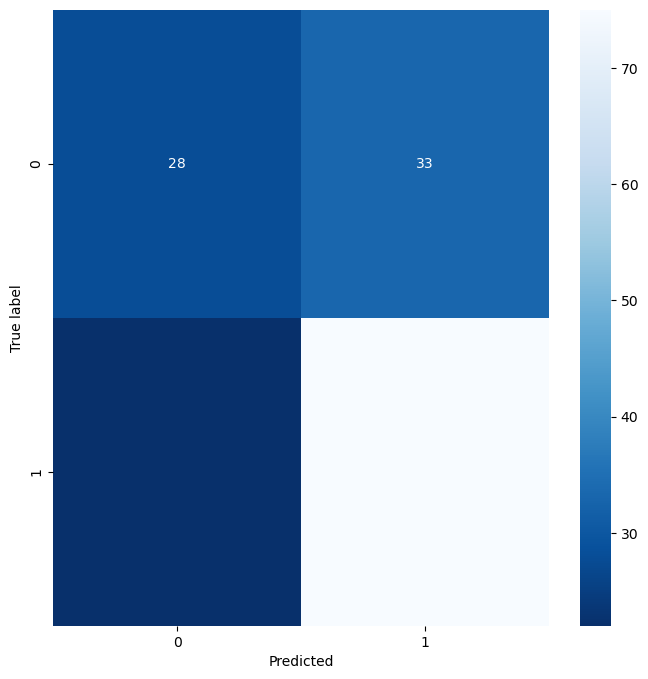

In [81]:
cm = confusion_matrix (y_test, y_pred)
plt.figure (figsize = (8,8))
sns.heatmap (cm, annot = True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Итоги данного обучения: 
1. получены следующие метрики: 

'accuracy 0.6518987341772152'

'recall 0.7731958762886598'

'precision 0.6944444444444444'

2. Получена матрица ошибок, анализ которой будет в сл пункте

### Проанализируйте модель логистической регрессии.

Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.

Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. 

Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

*Анализ*

Т.к. для заказчика главное - вкусное молоко, то критичнее всего будет ошибка первого рода, т.е. чтобы не вкусному молоку не присволи статус вкусное молоко. 

Т.е. за данный параметр отвечает метрика **precision** (метрика определяет не слишком ли часто она присваивает 1, классу с 0)

Необходимо поднимать данный показатель. 

**Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам.**

In [82]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_test', 'y_proba'])

In [83]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 5,endpoint=False)]
print(thresholds) 


columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x < i  else 1)
    
pd.set_option ('display.max_rows', None)
data[ data ['y_test'] == 0]

[0.5, 0.6, 0.7, 0.8, 0.9]


y_test   y_proba  y_pred_0.5  y_pred_0.6  y_pred_0.7  y_pred_0.8  \
0         0  0.549566           1           0           0           0   
3         0  0.381063           0           0           0           0   
6         0  0.282973           0           0           0           0   
9         0  0.256351           0           0           0           0   
10        0  0.196475           0           0           0           0   
11        0  0.551227           1           0           0           0   
14        0  0.532883           1           0           0           0   
15        0  0.533466           1           0           0           0   
16        0  0.648761           1           1           0           0   
18        0  0.565484           1           0           0           0   
19        0  0.200797           0           0           0           0   
28        0  0.520625           1           0           0           0   
30        0  0.378257           0           0           0           0   
31        0  0.492106           0           0           0           0   
32        0  0.401825           0           0           0           0   
33        0  0.558729           1           0           0           0   
37        0  0.688924           1           1           0           0   
39        0  0.712961           1           1           1           0   
44        0  0.399059           0           0           0           0   
45        0  0.532307           1           0           0           0   
58        0  0.255935           0           0           0           0   
68        0  0.334690           0           0           0           0   
69        0  0.361458           0           0           0           0   
70        0  0.520871           1           0           0           0   
71        0  0.428996           0           0           0           0   
72        0  0.592384           1           0           0           0   
73        0  0.458164           0           0           0           0   
74        0  0.531563           1           0           0           0   
78        0  0.587639           1           0           0           0   
79        0  0.569332           1           0           0           0   
87        0  0.621085           1           1           0           0   
89        0  0.391802           0           0           0           0   
90        0  0.576452           1           0           0           0   
92        0  0.789773           1           1           1           0   
97        0  0.655827           1           1           0           0   
99        0  0.390366           0           0           0           0   
101       0  0.568802           1           0           0           0   
102       0  0.589425           1           0           0           0   
103       0  0.556512           1           0           0           0   
108       0  0.798638           1           1           1           0   
109       0  0.671598           1           1           0           0   
111       0  0.779565           1           1           1           0   
116       0  0.810206           1           1           1           1   
117       0  0.485620           0           0           0           0   
124       0  0.381681           0           0           0           0   
126       0  0.372500           0           0           0           0   
129       0  0.202053           0           0           0           0   
132       0  0.456147           0           0           0           0   
135       0  0.852526           1           1           1           1   
137       0  0.621260           1           1           0           0   
139       0  0.523367           1           0           0           0   
140       0  0.345186           0           0           0           0   
141       0  0.521523           1           0           0           0   
142       0  0.491280           0           0           0      

После проведенного анализа и изучения задания от заказчика: Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам.

Можем определить новый порог = 0,87

Повторим действия, получим результаты модели и пересчитаем метрики: 
Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

In [84]:
pred = clf.predict_proba(X_test)[:, 1] > 0.8

In [85]:
accuracy = accuracy_score (y_test, pred)
recall = recall_score (y_test, pred)
precision = precision_score (y_test, pred)

display (f"accuracy {accuracy}")
display (f"recall {recall}")
display (f"precision {precision}")

'accuracy 0.44936708860759494'

'recall 0.12371134020618557'

'precision 0.8571428571428571'

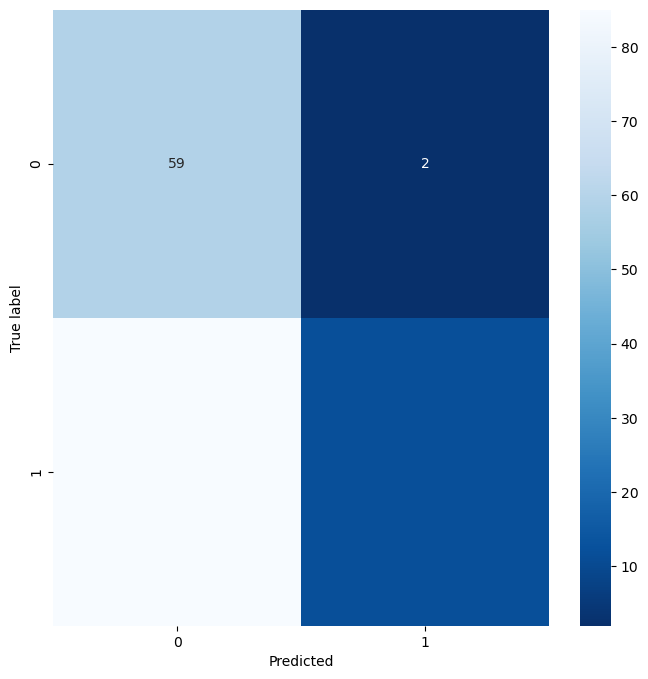

In [86]:
cm = confusion_matrix (y_test, pred)
plt.figure (figsize = (8,8))
sns.heatmap (cm, annot = True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

**Выводы** 

Исходя из данного анализа, можно сделать следующий вывод: 
1. для того чтобы модель на 100% предсказывала вкусное молоко, пришлось поднять порог до 87%. 
2. Модель стала чаще ошибаться на том что вкусное молоко будет не вкусным, но не наоборот, не делает не вкусное молоко вкусным. 
3. Точность модели из-за этого порога снизилась 

### С помощью обученной модели спрогнозируйте вкус молока коров

Которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз вкуса молока коров.

Изучим финальный датафрейм который передавался в кодировщик и масштабирование и приведем таблицу cow buy к такому же виду

In [87]:
display (X_taste.head(1))
display (cow_buy.head(1))

id  энергетическая_кормовая_единица  сырой_протеин_г  \
0   1                           201.64             1743   

  сахаро_протеиновое_соотношение          порода тип_пастбища  \
0                         Низкое  Вис Бик Айдиал    Равнинное   

  порода_папы_быка жирность_%  белок_%      возраст имя_папы  
0           Айдиал    Средняя    3.076  более_2_лет   Буйный

энергетическая_кормовая_единица  сырой_протеин_г  \
0                       233.205675      2019.532273   

  сахаро_протеиновое_соотношение          порода тип_пастбища  \
0                         Низкое  Вис Бик Айдиал    Холмистое   

  порода_папы_быка жирность_%  белок_%      возраст  имя_папы  
0           Айдиал    Средняя    3.076  более_2_лет  Геркулес

Данные приведены в соответсвие, можно приступать к предсказанию. 

In [88]:
catagory_name = ['сахаро_протеиновое_соотношение', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст',
                'жирность_%', 'имя_папы']
number_name = ['энергетическая_кормовая_единица', 'сырой_протеин_г', 'белок_%']


X_cow_buy_OHE = encoder.transform (cow_buy[catagory_name])

X_cow_buy_OHE = pd.DataFrame (X_cow_buy_OHE, columns = encoder_name)

X_cow_buy_scaled = scaler.transform (cow_buy [number_name])

X_cow_buy_scaled = pd.DataFrame (X_cow_buy_scaled, columns = number_name)

X_cow_buy = pd.concat ([X_cow_buy_scaled, X_cow_buy_OHE], axis = 1) 

prediction = clf.predict_proba(X_cow_buy)[:, 1] > 0.8

prediction

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False])

In [89]:
#проверим какие значения получились
prediction = clf.predict_proba(X_cow_buy)[:,1]
prediction

array([0.81553997, 0.78274018, 0.67434999, 0.59257289, 0.62160489,
       0.31337702, 0.59429944, 0.81330725, 0.51516038, 0.55554554,
       0.26930123, 0.67923428, 0.44074581, 0.68947126, 0.4105559 ,
       0.45768289])

**Вывод**

из результатов данной модели можно сделать следующий вывод, что ни одна корова не перевалила через выставленный нами барьеры (когда модель не ошибается) 

Составим истоговую таблицу с предсказаниями

In [90]:
cow_buy_pred['вкус_молока_пред'] = prediction

In [91]:
#Настроим фильтры 

cow_buy_pred[ (cow_buy_pred ['удой_кг_пред'] >= 6000)  ].sort_values (by = 'вкус_молока_пред', ascending = False)

энергетическая_кормовая_единица  сырой_протеин_г  \
0                        233.205675      2019.532273   
16                       233.205675      2019.532273   
4                        233.205675      2019.532273   
7                        233.205675      2019.532273   
3                        233.205675      2019.532273   
11                       233.205675      2019.532273   
10                       233.205675      2019.532273   
18                       233.205675      2019.532273   
15                       233.205675      2019.532273   
17                       233.205675      2019.532273   
5                        233.205675      2019.532273   
12                       233.205675      2019.532273   

   сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                          Низкое   Вис Бик Айдиал    Холмистое   
16                        Высокое   Вис Бик Айдиал    Холмистое   
4                          Низкое  РефлешнСоверинг    Равнинное   
7                         Высокое   Вис Бик Айдиал    Равнинное   
3                          Низкое  РефлешнСоверинг    Холмистое   
11                        Высокое  РефлешнСоверинг    Равнинное   
10                         Низкое   Вис Бик Айдиал    Холмистое   
18                        Высокое   Вис Бик Айдиал    Равнинное   
15                        Высокое  РефлешнСоверинг    Холмистое   
17                         Низкое  РефлешнСоверинг    Равнинное   
5                          Низкое  РефлешнСоверинг    Равнинное   
12                        Высокое   Вис Бик Айдиал    Холмистое   

   порода_папы_быка жирность_%  белок_%      возраст  имя_папы  удой_кг_пред  \
0            Айдиал    Средняя    3.076  более_2_лет  Геркулес   6159.982684   
16          Соверин    Высокая    3.079  более_2_лет  Соловчик   6367.842880   
4            Айдиал    Средняя    3.074  более_2_лет    Буйный   6125.700714   
7           Соверин    Средняя    3.079  более_2_лет    Буйный   6324.370822   
3            Айдиал     Низкая    3.061  более_2_лет    Буйный   6279.891604   
11          Соверин    Высокая    3.073  более_2_лет  Геркулес   6571.060913   
10          Соверин    Высокая    3.055  более_2_лет  Соловчик   6266.031263   
18          Соверин     Низкая    3.069  более_2_лет    Буйный   6383.991639   
15           Айдиал     Низкая    3.065  более_2_лет    Буйный   6515.979345   
17          Соверин    Высокая    3.053  менее_2_лет  Геркулес   6228.767502   
5           Соверин    Средняя    3.053  менее_2_лет  Геркулес   6031.450698   
12           Айдиал    Высокая    3.046  более_2_лет  Геркулес   6821.656641   

    вкус_молока_пред  
0           0.815540  
16          0.689471  
4           0.621605  
7           0.594299  
3           0.592573  
11          0.555546  
10          0.515160  
18          0.457683  
15          0.440746  
17          0.410556  
5           0.313377  
12          0.269301

Выведен список по убыванию коров которые будут приносить > 6тонн молока и одна корова у которой вероятность выдачи вкусного молока выше порога (первая в списке) 

## Итоговые выводы

В данной работе были проделаны следующие пункты: 

- загруженны данные
- выполнена предобработка, т.е. удалены дубликаты (явные и неявные), очищены пропуски
- выполнен исследовательский анализ данных
- рассмотрены корреляционные зависимости между всеми параметрами
- построено 3 модели линейной регрессии, выбрана лучшая, по ней спрогнозированно количество молока которое будут давать коровы 
- Построена Логистическая модель, оценены ее метрики, изменен порог так чтобы показатель точности дачи вкусного молока коров был 100% 
- применена модель получены результаты 

По результатам данной работы, было получено следующее, что 12 коров дадут молока больше 6 тонн и первая в списке даст вкусное молоко. 

Наилучшим выбором для покупки будут следующие результаты (расположены по убыванию): 

т.к. они дают больше 6 тонн и вероятность того что дадут вкусное молоко ближе всего к порогу. 

In [92]:
cow_buy_pred[ (cow_buy_pred ['удой_кг_пред'] >= 6000) &
             (cow_buy_pred ['вкус_молока_пред'] >= 0.5) ].sort_values (by = 'вкус_молока_пред', ascending = False)

энергетическая_кормовая_единица  сырой_протеин_г  \
0                        233.205675      2019.532273   
16                       233.205675      2019.532273   
4                        233.205675      2019.532273   
7                        233.205675      2019.532273   
3                        233.205675      2019.532273   
11                       233.205675      2019.532273   
10                       233.205675      2019.532273   

   сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                          Низкое   Вис Бик Айдиал    Холмистое   
16                        Высокое   Вис Бик Айдиал    Холмистое   
4                          Низкое  РефлешнСоверинг    Равнинное   
7                         Высокое   Вис Бик Айдиал    Равнинное   
3                          Низкое  РефлешнСоверинг    Холмистое   
11                        Высокое  РефлешнСоверинг    Равнинное   
10                         Низкое   Вис Бик Айдиал    Холмистое   

   порода_папы_быка жирность_%  белок_%      возраст  имя_папы  удой_кг_пред  \
0            Айдиал    Средняя    3.076  более_2_лет  Геркулес   6159.982684   
16          Соверин    Высокая    3.079  более_2_лет  Соловчик   6367.842880   
4            Айдиал    Средняя    3.074  более_2_лет    Буйный   6125.700714   
7           Соверин    Средняя    3.079  более_2_лет    Буйный   6324.370822   
3            Айдиал     Низкая    3.061  более_2_лет    Буйный   6279.891604   
11          Соверин    Высокая    3.073  более_2_лет  Геркулес   6571.060913   
10          Соверин    Высокая    3.055  более_2_лет  Соловчик   6266.031263   

    вкус_молока_пред  
0           0.815540  
16          0.689471  
4           0.621605  
7           0.594299  
3           0.592573  
11          0.555546  
10          0.515160

**Рекомндации** 

Для более точного прогнозирования, необходимо уточнить свойства корма которым кормили и будут кормить данных коров, тогда показатели будут более точными. 

Линейная регрессия используется для  прогнозирования колличественных данных, а логистическая для категориальных
1. Улучшене моделей - введение доп параметров не зависящих друг от друга. 
2. устаранение мультиколлинеарности 

Бизнес-метрики: Ожидаемые потери или доходы, связанные с различными типами ошибок классификации. необходимо представление данных о доходах и потерях при неправильном выборе, тогда можно дать экономическую оценку. 